# Assignment 1
<br>
This assignment conducts an Exporatory Data Analysis (EDA) of the dataset from Flickr website to understand user behaviour, posting patterns, and key structural characteristics of the data.


The analysis was conducted in the following stages:
*   Step 1: Load, parse and merge data files
*   Step 2: Apply EDA on the merged dataset with visualizations


## Step 1: Load, parse and merge data files

Two files (Group056.json and Group056.xml) were used for this task. They were read and their overall structures were examined. Each file contains seventeen columns. As both files shared the same structure, they were combined into a single dataframe named 'combined_df'.

In [53]:
# Read JSON file
import pandas as pd
import numpy as np

json_df = pd.read_json('Group056.json')
json_df.head()

,PostID,UserID,secret,server,title,ispublic,isfriend,isfamily,farm,City,Country,Post_date,Taken_date,tags,latitude,longitude,description,min_taken_date
0,5.199002e+10,24761036@N00,07d563ccd0,65535.0,succulent,1.0,0.0,0.0,66.0,Melbourne,Australia,2022-04-08 10:21:59,2022-04-05 13:25:36,"walk,walking,local,neighbourhood,suburbia,subu...",-37.802595,145.132386,None,2022-04-05 00:00:00
1,2.836122e+10,151249447@N03,2b4ba94261,824.0,DSC_4677resized,1.0,0.0,0.0,1.0,None,Australia,2018-05-20 16:19:47,2018-05-03 12:57:16,None,-37.188633,144.384577,Malmsbury,2018-05-02 00:00:00
2,5.178772e+10,69558585@N02,c99cd418d2,65535.0,"NR96, NR114 and NR57 at Beveridge with 3MB1",1.0,0.0,0.0,66.0,None,None,2021-12-30 11:54:31,2021-11-23 19:50:27,None,-37.471311,144.995788,"NR96, NR114 and NR57 power up the 1 in 50 grad...",2021-11-23 00:00:00
3,4.699277e+10,66885639@N07,daaf321ff8,65535.0,"Melbourne, 11 March 2019 (22)",1.0,0.0,0.0,66.0,None,England,2019-05-05 19:07:25,2019-03-11 14:47:02,"australia,melbourne,victoria,",-37.822209,144.959186,None,2019-03-11 00:00:00
4,4.990019e+10,81160236@N02,409c84eb09,65535.0,DSC_8458,1.0,0.0,0.0,66.0,None,Australia,2020-05-16 03:02:19,2020-05-14 15:30:06,None,-42.877473,147.336616,None,2020-05-14 00:00:00


In [54]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PostID          34588 non-null  float64
 1   UserID          34588 non-null  object 
 2   secret          34588 non-null  object 
 3   server          34588 non-null  float64
 4   title           33226 non-null  object 
 5   ispublic        34588 non-null  float64
 6   isfriend        34588 non-null  float64
 7   isfamily        34588 non-null  float64
 8   farm            34588 non-null  float64
 9   City            17999 non-null  object 
 10  Country         18866 non-null  object 
 11  Post_date       35000 non-null  object 
 12  Taken_date      34588 non-null  object 
 13  tags            22962 non-null  object 
 14  latitude        34588 non-null  float64
 15  longitude       34588 non-null  float64
 16  description     16231 non-null  object 
 17  min_taken_date  35000 non-null 

In [55]:
# Read XML file
import pandas as pd

xml_df = pd.read_xml('Group056.xml')
xml_df.head()

,PostID,UserID,secret,server,title,ispublic,isfriend,isfamily,farm,City,Country,Post_date,Taken_date,tags,latitude,longitude,description,min_taken_date
0,5.277941e+10,41238978@N02,8724af957b,65535.0,2023-03-28 13.32.44,1.0,0.0,0.0,66.0,Melbourne,Australia,2023-03-29 10:55:20,2023-03-28 13:32:44,None,-35.294167,149.142499,None,2023-03-28 00:00:00
1,4.180627e+10,88287135@N00,a1c39f5804,1735.0,Cake plate decoration,1.0,0.0,0.0,2.0,None,None,2018-05-19 04:10:28,2018-05-19 14:10:28,"birthday,event,party,camera:make=fujifilm,geoc...",-30.489986,153.018797,None,2018-05-19 00:00:00
2,5.003936e+10,76039553@N03,0c0a623da7,65535.0,Galax-Arena_Collingullie 24June2020,1.0,0.0,0.0,66.0,None,None,2020-06-24 09:27:43,2020-06-24 10:53:31,None,-35.088188,147.127112,"<a href=""https://www.bookcrossing.com/journal/...",2020-06-24 00:00:00
3,2.607021e+10,13533277@N00,979529a116,4744.0,None,1.0,0.0,0.0,5.0,None,England,2018-01-28 10:19:53,2018-01-17 17:15:21,None,-33.424839,151.428513,None,2018-01-17 00:00:00
4,5.240041e+10,126218062@N02,9fec5fd6db,65535.0,6Q2A0767,1.0,0.0,0.0,66.0,None,None,2022-10-03 05:46:21,2022-10-02 07:00:33,None,-34.936255,147.380433,Gears &amp; Beers 2 Oct 2022,2022-10-02 00:00:00


In [56]:
xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PostID          34606 non-null  float64
 1   UserID          34606 non-null  object 
 2   secret          34606 non-null  object 
 3   server          34606 non-null  float64
 4   title           33322 non-null  object 
 5   ispublic        34606 non-null  float64
 6   isfriend        34606 non-null  float64
 7   isfamily        34606 non-null  float64
 8   farm            34606 non-null  float64
 9   City            17947 non-null  object 
 10  Country         18812 non-null  object 
 11  Post_date       35000 non-null  object 
 12  Taken_date      34605 non-null  object 
 13  tags            23160 non-null  object 
 14  latitude        34605 non-null  float64
 15  longitude       34605 non-null  float64
 16  description     16475 non-null  object 
 17  min_taken_date  35000 non-null 

### Combine Both dataset

After dataset combination, there are eigthteen columns, containing

* Five identifier columns: PostID, UserID, secret, server and farm.
* Five text columns: title, Country, City, tags, and description.
* Three boolean columns: ispublic, isfriend, and isfamily.
* Three datetime columns: Post_date, Taken_date, and min_taken_date
* Two geographic columns: latitude and longitude.


In [57]:
combined_df = pd.concat([json_df, xml_df])
combined_df.head()

,PostID,UserID,secret,server,title,ispublic,isfriend,isfamily,farm,City,Country,Post_date,Taken_date,tags,latitude,longitude,description,min_taken_date
0,5.199002e+10,24761036@N00,07d563ccd0,65535.0,succulent,1.0,0.0,0.0,66.0,Melbourne,Australia,2022-04-08 10:21:59,2022-04-05 13:25:36,"walk,walking,local,neighbourhood,suburbia,subu...",-37.802595,145.132386,None,2022-04-05 00:00:00
1,2.836122e+10,151249447@N03,2b4ba94261,824.0,DSC_4677resized,1.0,0.0,0.0,1.0,None,Australia,2018-05-20 16:19:47,2018-05-03 12:57:16,None,-37.188633,144.384577,Malmsbury,2018-05-02 00:00:00
2,5.178772e+10,69558585@N02,c99cd418d2,65535.0,"NR96, NR114 and NR57 at Beveridge with 3MB1",1.0,0.0,0.0,66.0,None,None,2021-12-30 11:54:31,2021-11-23 19:50:27,None,-37.471311,144.995788,"NR96, NR114 and NR57 power up the 1 in 50 grad...",2021-11-23 00:00:00
3,4.699277e+10,66885639@N07,daaf321ff8,65535.0,"Melbourne, 11 March 2019 (22)",1.0,0.0,0.0,66.0,None,England,2019-05-05 19:07:25,2019-03-11 14:47:02,"australia,melbourne,victoria,",-37.822209,144.959186,None,2019-03-11 00:00:00
4,4.990019e+10,81160236@N02,409c84eb09,65535.0,DSC_8458,1.0,0.0,0.0,66.0,None,Australia,2020-05-16 03:02:19,2020-05-14 15:30:06,None,-42.877473,147.336616,None,2020-05-14 00:00:00


In [58]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PostID          69194 non-null  float64
 1   UserID          69194 non-null  object 
 2   secret          69194 non-null  object 
 3   server          69194 non-null  float64
 4   title           66548 non-null  object 
 5   ispublic        69194 non-null  float64
 6   isfriend        69194 non-null  float64
 7   isfamily        69194 non-null  float64
 8   farm            69194 non-null  float64
 9   City            35946 non-null  object 
 10  Country         37678 non-null  object 
 11  Post_date       70000 non-null  object 
 12  Taken_date      69193 non-null  object 
 13  tags            46122 non-null  object 
 14  latitude        69193 non-null  float64
 15  longitude       69193 non-null  float64
 16  description     32706 non-null  object 
 17  min_taken_date  70000 non-null  obje

Inspection of the dataset using .info() revealed that the datetime-related columns were stored as object type. Storing datetime variables as object type prevents proper temporal operations. Moreover, storing identifiers as float64 may lead to precision loss.

Further examination of the dataframe  demonstrated that ispublic, isfriend, and isfamily contain binary values (1 or 0), with each column exhibiting a single unique value (1, 0, and 0, respectively). Based on their binary encoding and naming convention, these variables are interpreted as boolean indicators.

Therefore, type correction was required.



In [59]:
combined_df_copy01 = combined_df.copy()

# Change PostID to string type as it is used as an identifier
# PostID is firt cast to integer to remove .0 before convert to string
combined_df_copy01['PostID'] = combined_df_copy01['PostID'].astype('Int64').astype(str)

# Convert date columns to datetime type
combined_df_copy01['Taken_date'] = pd.to_datetime(combined_df_copy01['Taken_date'])
combined_df_copy01['min_taken_date'] = pd.to_datetime(combined_df_copy01['min_taken_date'])
combined_df_copy01['Post_date'] = pd.to_datetime(combined_df_copy01['Post_date'])

combined_df_copy01.head(30)

,PostID,UserID,secret,server,title,ispublic,isfriend,isfamily,farm,City,Country,Post_date,Taken_date,tags,latitude,longitude,description,min_taken_date
0,51990024136,24761036@N00,07d563ccd0,65535.0,succulent,1.0,0.0,0.0,66.0,Melbourne,Australia,2022-04-08 10:21:59,2022-04-05 13:25:36,"walk,walking,local,neighbourhood,suburbia,subu...",-37.802595,145.132386,None,2022-04-05
1,28361222078,151249447@N03,2b4ba94261,824.0,DSC_4677resized,1.0,0.0,0.0,1.0,None,Australia,2018-05-20 16:19:47,2018-05-03 12:57:16,None,-37.188633,144.384577,Malmsbury,2018-05-02
2,51787724954,69558585@N02,c99cd418d2,65535.0,"NR96, NR114 and NR57 at Beveridge with 3MB1",1.0,0.0,0.0,66.0,None,None,2021-12-30 11:54:31,2021-11-23 19:50:27,None,-37.471311,144.995788,"NR96, NR114 and NR57 power up the 1 in 50 grad...",2021-11-23
3,46992773424,66885639@N07,daaf321ff8,65535.0,"Melbourne, 11 March 2019 (22)",1.0,0.0,0.0,66.0,None,England,2019-05-05 19:07:25,2019-03-11 14:47:02,"australia,melbourne,victoria,",-37.822209,144.959186,None,2019-03-11
4,49900193482,81160236@N02,409c84eb09,65535.0,DSC_8458,1.0,0.0,0.0,66.0,None,Australia,2020-05-16 03:02:19,2020-05-14 15:30:06,None,-42.877473,147.336616,None,2020-05-14
5,40743901123,68153555@N00,f959189522,65535.0,Hannah slides,1.0,0.0,0.0,66.0,Toowoomba,Australia,2019-04-27 05:25:32,2019-04-13 13:34:14,None,-17.432420,145.860436,Josephine Falls,2019-04-13
6,45416732134,127449591@N07,cfafb61cc3,4900.0,D71_5271,1.0,0.0,0.0,5.0,Brisbane,Australia,2018-12-02 07:47:49,2018-11-18 14:40:55,"uranganboatharbour,urangan,boatharbour,boat,bo...",-25.293585,152.909420,None,2018-11-18
7,49857563067,40883175@N06,dd68d3d6fc,65535.0,Pacific Black Duck,1.0,0.0,0.0,66.0,None,None,2020-05-05 01:49:43,2020-05-05 07:05:32,"ballarat,victoria,australia,lakewendouree,lake...",-37.546548,143.823894,Lake Wendouree. Ballarat.,2020-05-04
8,51176798365,48583839@N07,5ef600f571,65535.0,Story Bridge At Night Brisbane-6,1.0,0.0,0.0,66.0,Melbourne,Australia,2021-05-13 06:32:40,2021-03-09 22:15:33,"brisbane,canon,helen,night,queensland,storybri...",-27.462264,153.036638,None,2021-03-09
9,50215600203,19111040@N00,00e1c142c3,65535.0,20200811_121505,1.0,0.0,0.0,66.0,Adelaide,Australia,2020-08-11 22:31:46,2020-08-11 12:15:05,None,-34.934723,138.593333,None,2020-08-10


In [60]:
# Change PostID to string type as it is used as an identifier
combined_df_copy01['ispublic'] = combined_df_copy01['ispublic'].astype('boolean')
combined_df_copy01['isfriend'] = combined_df_copy01['isfriend'].astype('boolean')
combined_df_copy01['isfamily'] = combined_df_copy01['isfamily'].astype('boolean')

combined_df_copy01.head()

,PostID,UserID,secret,server,title,ispublic,isfriend,isfamily,farm,City,Country,Post_date,Taken_date,tags,latitude,longitude,description,min_taken_date
0,51990024136,24761036@N00,07d563ccd0,65535.0,succulent,True,False,False,66.0,Melbourne,Australia,2022-04-08 10:21:59,2022-04-05 13:25:36,"walk,walking,local,neighbourhood,suburbia,subu...",-37.802595,145.132386,None,2022-04-05
1,28361222078,151249447@N03,2b4ba94261,824.0,DSC_4677resized,True,False,False,1.0,None,Australia,2018-05-20 16:19:47,2018-05-03 12:57:16,None,-37.188633,144.384577,Malmsbury,2018-05-02
2,51787724954,69558585@N02,c99cd418d2,65535.0,"NR96, NR114 and NR57 at Beveridge with 3MB1",True,False,False,66.0,None,None,2021-12-30 11:54:31,2021-11-23 19:50:27,None,-37.471311,144.995788,"NR96, NR114 and NR57 power up the 1 in 50 grad...",2021-11-23
3,46992773424,66885639@N07,daaf321ff8,65535.0,"Melbourne, 11 March 2019 (22)",True,False,False,66.0,None,England,2019-05-05 19:07:25,2019-03-11 14:47:02,"australia,melbourne,victoria,",-37.822209,144.959186,None,2019-03-11
4,49900193482,81160236@N02,409c84eb09,65535.0,DSC_8458,True,False,False,66.0,None,Australia,2020-05-16 03:02:19,2020-05-14 15:30:06,None,-42.877473,147.336616,None,2020-05-14


In [61]:
combined_df_copy01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PostID          70000 non-null  object        
 1   UserID          69194 non-null  object        
 2   secret          69194 non-null  object        
 3   server          69194 non-null  float64       
 4   title           66548 non-null  object        
 5   ispublic        69194 non-null  boolean       
 6   isfriend        69194 non-null  boolean       
 7   isfamily        69194 non-null  boolean       
 8   farm            69194 non-null  float64       
 9   City            35946 non-null  object        
 10  Country         37678 non-null  object        
 11  Post_date       70000 non-null  datetime64[ns]
 12  Taken_date      69193 non-null  datetime64[ns]
 13  tags            46122 non-null  object        
 14  latitude        69193 non-null  float64       
 15  longitu

### Column Names Standardization

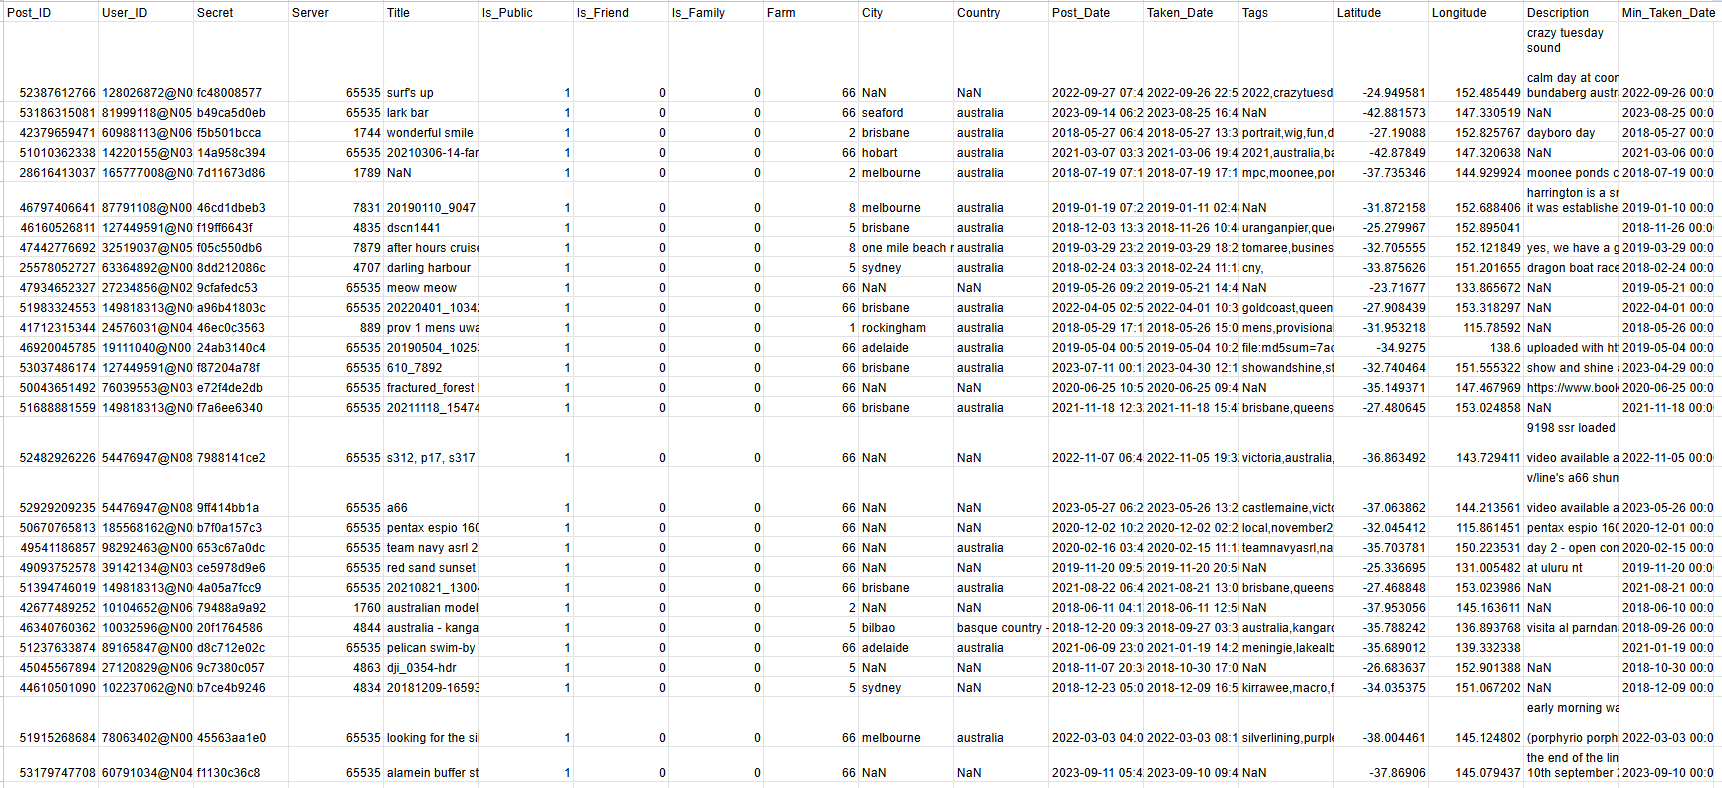

To align the column names of given files correlated with the sample file shown previously, the first letter of single-word column names was capitalized.

The columns begining with 'Is' (Ispublic, Isfriend, Isfamily) were reformatted by inserting an after 'is'. ID-related columns were standardize by adding an underscore before 'ID'. Additionally, Min_taken_date was converted to Min_Taken_Date.

In [62]:
combined_df_copy01 = combined_df_copy01.rename(
    columns={col: col[0].upper() + col[1:] for col in combined_df_copy01.columns}
)

In [63]:
combined_df_copy01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PostID          70000 non-null  object        
 1   UserID          69194 non-null  object        
 2   Secret          69194 non-null  object        
 3   Server          69194 non-null  float64       
 4   Title           66548 non-null  object        
 5   Ispublic        69194 non-null  boolean       
 6   Isfriend        69194 non-null  boolean       
 7   Isfamily        69194 non-null  boolean       
 8   Farm            69194 non-null  float64       
 9   City            35946 non-null  object        
 10  Country         37678 non-null  object        
 11  Post_date       70000 non-null  datetime64[ns]
 12  Taken_date      69193 non-null  datetime64[ns]
 13  Tags            46122 non-null  object        
 14  Latitude        69193 non-null  float64       
 15  Longitu

In [64]:
import re

# Define function to change column names:
def rename_col(col):
  # Ispublic, Isfriend, Isfamily -> Is_public, Is_friend, Is_family
  col = re.sub(r'^Is', 'Is_', col)
  # PostID, UserID -> User_ID, User_ID
  col = re.sub(r'ID$', '_ID', col)
  return col

combined_df_copy01 = combined_df_copy01.rename(
    columns={col: rename_col(col) for col in combined_df_copy01.columns}
)

In [65]:
combined_df_copy01 = combined_df_copy01.rename(
    # Convert the letter after underscore to capital letter
    columns=lambda col: re.sub(
        r'_(.)',
        lambda m: '_' + m.group(1).upper(),
        col
    )
)

In [66]:
combined_df_copy01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Post_ID         70000 non-null  object        
 1   User_ID         69194 non-null  object        
 2   Secret          69194 non-null  object        
 3   Server          69194 non-null  float64       
 4   Title           66548 non-null  object        
 5   Is_Public       69194 non-null  boolean       
 6   Is_Friend       69194 non-null  boolean       
 7   Is_Family       69194 non-null  boolean       
 8   Farm            69194 non-null  float64       
 9   City            35946 non-null  object        
 10  Country         37678 non-null  object        
 11  Post_Date       70000 non-null  datetime64[ns]
 12  Taken_Date      69193 non-null  datetime64[ns]
 13  Tags            46122 non-null  object        
 14  Latitude        69193 non-null  float64       
 15  Longitu

After preprocessing and schema standardization, Exploratory Data Analysis (EDA) is conducted to gain an in-depth understanding of the merged dataset. The analysis focuses on identifying structural patterns, distributional characteristics, and potential irregularities temporal, textual, geographic, and privacy-related variables through descriptive statistics and visualization.

### Text Processing

As part of preparation process, text-based fields were standarded. 'Title', 'City', 'Country', 'Tags' and 'Description' were converted to lowercase, while 'NaN' values remained unchanged. Regex patterns were applied to eliminate HTML/XML elements, emoji symbols, and non-UTF-8 characters. Moreover, all non-English alphabets were removed.

In [67]:
to_lower = ['Title', 'City', 'Country', 'Tags', 'Description']

# Normalise null-like values to NaN
combined_df_copy01 = combined_df_copy01.replace(['', 'None', 'null'], np.nan)

# Convert to lowercase
for col in to_lower:
  combined_df_copy01[col] = combined_df_copy01[col].str.lower()

In [68]:
import html

def clean_data(df):
  '''
  Clean text data
  - Remove extra whitespace
  - Remove non-English words
  - Remove special characters
  - Remove non-ASCII characters
  - Remove emoji-like characters
  - Remove HTML- or XML-like tags
  - Remove HTML character entities
  '''
  s = df.str.strip()
  s = s.str.replace(r'\s+', ' ', regex=True)
  s = s.str.replace(r'[^\w\s.,!?;]', ' ', regex=True)
  s = s.str.replace(r'[^A-Za-z0-9\s.,!?;]', '', regex=True)
  s = s.str.replace(r'[^\x00-\x7F]+', '', regex=True)
  s = s.str.replace(r'[:;=8][\-o0\*\']?\s*[)(]', '', regex=True)
  s = s.str.replace(r'<.*?>', '', regex=True)
  s = s.str.replace(r'(?<!&)amp;', '&', regex=True)
  s = s.str.replace(r'(?<!&)lt;', '<', regex=True)
  s = s.str.replace(r'(?<!&)gt;', '>', regex=True)
  s = s.str.replace(r'(?<!&)quot;', '"', regex=True)
  s = s.str.replace(r'(?<!&)apos;', "'", regex=True)

  return s


In [69]:
# Apply 'clean_data' function to clean the columns containing text
text_cols = ['Title', 'Tags', 'Description']
combined_df_copy01[text_cols] = combined_df_copy01[text_cols].apply(clean_data)

In [70]:
combined_df_copy01[combined_df_copy01['Description'].notna()].head(10)

,Post_ID,User_ID,Secret,Server,Title,Is_Public,Is_Friend,Is_Family,Farm,City,Country,Post_Date,Taken_Date,Tags,Latitude,Longitude,Description,Min_Taken_Date
1,28361222078,151249447@N03,2b4ba94261,824.0,dsc4677resized,True,False,False,1.0,None,australia,2018-05-20 16:19:47,2018-05-03 12:57:16,None,-37.188633,144.384577,malmsbury,2018-05-02
2,51787724954,69558585@N02,c99cd418d2,65535.0,"nr96, nr114 and nr57 at beveridge with 3mb1",True,False,False,66.0,None,None,2021-12-30 11:54:31,2021-11-23 19:50:27,None,-37.471311,144.995788,"nr96, nr114 and nr57 power up the 1 in 50 grad...",2021-11-23
5,40743901123,68153555@N00,f959189522,65535.0,hannah slides,True,False,False,66.0,toowoomba,australia,2019-04-27 05:25:32,2019-04-13 13:34:14,None,-17.432420,145.860436,josephine falls,2019-04-13
7,49857563067,40883175@N06,dd68d3d6fc,65535.0,pacific black duck,True,False,False,66.0,None,None,2020-05-05 01:49:43,2020-05-05 07:05:32,"ballarat,victoria,australia,lakewendouree,lake...",-37.546548,143.823894,lake wendouree. ballarat.,2020-05-04
10,53198448740,7272097@N08,c222303b0e,65535.0,septarian nodules at deception bay,True,False,False,66.0,None,None,2023-09-19 07:00:06,2023-08-26 11:34:15,"australia,iphone,queensland,qld,deceptionbay,s...",-27.177425,153.031144,i recently saw this interesting coastal geolog...,2023-08-26
12,51895626647,149818313@N06,62f2512939,65535.0,2022021120163105488blr,True,False,False,66.0,brisbane,australia,2022-02-22 06:28:38,2022-02-11 20:16:31,"carnivale,seaworld,goldcoast,queensland,austra...",-27.955914,153.425111,,2022-02-11
13,45011909424,11363099@N08,4fa0e43e93,4806.0,img0675,True,False,False,5.0,None,None,2018-11-05 19:02:48,2018-09-22 14:42:08,None,-37.679834,145.430405,wine tasting tour in melbourne,2018-09-22
14,53487132517,73561613@N06,659c922489,65535.0,pretty blue sunrise at the beach with calm seas,True,False,False,66.0,woy woy,australia,2024-01-26 06:56:53,2023-10-24 06:04:16,"water,cloudbank,coast,landscape,sunrise,sky,he...",-33.533217,151.359075,sunrise seascape with a calm sea at killcare b...,2023-10-23
16,52889302095,97974874@N00,45a4bf6014,65535.0,dawsonia superba var. pulchra giant moss,True,False,False,66.0,None,None,2023-05-11 13:07:13,2023-05-06 10:07:59,"dawsonia,dawsoniasuperba,dawsoniasuperbavarpul...",-32.061620,151.683180,b copyright all rights reserved black dia...,2023-05-06
18,41694757812,87791108@N00,338e479a6e,951.0,201804221395 karen community men,True,False,False,1.0,melbourne,australia,2018-04-27 11:09:13,2018-04-22 12:57:06,None,-37.900323,144.664492,"members of the wyndham karen community, after ...",2018-04-21


Further textual processing were implemented to prepare data for the further analysis. The process included breaking text into tokens, filtering out non-informative characters and stopwords, and transforming words to their dictionary forms to minimize vocabulary variations.

In [71]:
!pip install nltk

In [72]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [73]:
lemmatizer = WordNetLemmatizer()

def preprocess_txt(txt):

  # If value is not a string or an whitespace, return []
  if not isinstance(txt, str) or txt.strip() == '':
    return []

  txt = txt.lower()
  txt = re.sub(r'https?://\S+|www\.\S+', ' ', txt)
  txt = re.sub(r'[^a-z0-9\s]', ' ', txt).strip()

  # Tokenize the text
  tokens = word_tokenize(txt)

  # Token/words should more than 1 letters
  tokens = [token for token in tokens if len(token) > 1]

  # Remove stop words
  filtered_tokens = [token for token in tokens if token not in set(stopwords.words('english'))]

  # Lemmatize the tokens to dictionary base form
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # Join the tokens back into a string
  #processed_text = ' '.join(lemmatized_tokens)

  return lemmatized_tokens


## Step 2: Apply EDA on the merged dataset with visualizations

### EDA of Text columns

#### EDA of Description

The text in 'Description' column was processed using the preprocess_txt() function to clean the data and facilitate the downstream analysis. Therefore, we broke down the words to tokens.




In [74]:
state_for_desc = {
    'south australia': 'southaustralia',
    'new south wales': 'newsouthwales',
    'western australia': 'westaustralia',
    'northern territory': 'northernterritory',
    'australian capital territory': 'act',
    'national park': 'nationalpark'
}


In [75]:
def normalize_states(text):

  if not isinstance(text, str):
    return text

  for k, v in state_for_desc.items():
    text = text.replace(k, v)


  return text

In [76]:
combined_df_copy01['Description_nospace'] = (
    combined_df_copy01['Description']
    .apply(normalize_states)
)

In [77]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


combined_df_copy01[
    combined_df_copy01['Description'].str.contains(r'\b(one|day)\b',
                                                   case=False,
                                                   na=False)]['Description']


/tmp/ipython-input-939033119.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  combined_df_copy01['Description'].str.contains(r'\b(one|day)\b',


,Description
30,91rm rounds the curve onto the bullarto straight at the end of brunts rd with the first train for the day at the daylesford spa country railway
36,"race 1, day 2 at the lswsa new year regatta"
82,"this vessel just appeared when we were driving into point lonsdale; pulled the car over, switched on the ricoh griiix and snapped this frame. the day had started with warm sunshine and by late afternoon we revisited winter. ricoh griii"
97,"the nikon f 401 n4004 in north america was a beginner s level, autofocus, 35mm, single lens reflex slr film camera built by nikon and introduced in 1987. the camera represented one of nikon s first endeavours into consumer based autofocus, as a follow up to their first autofocus slr in 1986, the nikon f 501 known as the n2020 in north america . the camera lacked many of the advanced features that more seasoned amateurs and professionals required, but it was a harbinger of the future as it included a pronounced, built in grip as well as an integrated ttl flash that is now commonplace on all but the most high end slr cameras. the f 401 introduced the now common place feature of using a thumbwheel instead of lens aperture ring to adjust the aperture. furthermore, the camera s lack of support for ai lenses meant that while all previous nikon lenses could be mounted to the camera, none supported automatic exposure ttl metering. by the 1990s, the f 401 was part of a lineup of autofocus consumer slrs that included the more expensive nikon f 601 and nikon f 801."
138,"the australian magpie gymnorhina tibicen is a medium sized black and white passerine bird native to australia and southern new guinea. although once considered to be three separate species, it is now considered to be one, with nine recognised subspecies. a member of the artamidae, the australian magpie is placed in its own genus and is most closely related to the black butcherbird melloria quoyi . currawongs have yellow eyes, whereas magpies have red brown eyes and butcherbirds have very dark brown, almost black eyes. it is not, however, closely related to the european magpie, which is a corvid. the adult australian magpie is a fairly robust bird ranging from 37 to 43 cm in length, with distinctive black and white plumage, gold brown eyes and a solid wedge shaped bluish white and black bill. the male and female are similar in appearance, and can be distinguished by differences in back markings. the male has pure white feathers on the back of the head and the female has white blending to grey feathers on the back of the head. with its long legs, the australian magpie walks rather than waddles or hops and spends much time on the ground. described as one of australia s most accomplished songbirds, the australian magpie has an array of complex vocalisations. it is omnivorous, with the bulk of its varied diet made up of invertebrates. it is generally sedentary and territorial throughout its range. common and widespread, it has adapted well to human habitation and is a familiar bird of parks, gardens and farmland in australia and new guinea. this species is commonly fed by households around the country, but in spring and occasionally in autumn a small minority of breeding magpies almost always males become aggressive and swoop and attack those who approach their nests. r4123"
...,...
34945,"meet me at the paragon exhibition community day phillip bacon heritage gallery, state library of queensland exhibition runs 27th sept 2019 15 mar 2020 strong creator strong photographer josef ruckli strong location strong brisbane, queensland. strong description strong meet me at the paragon community day 29.09.19. mrs maureen cholakos and her daughter mrs carol frassetto enjoying the white gloves experience and collections on greeks in queensland from the john oxley library. strong find out more about meet me at the paragon strong a href https www.slq.qld.gov.au greek cafes rel noreferrer nofollow www.slq.qld.gov.au greek cafes a this image is 

In [78]:
# Apply text preprocessing function
combined_df_copy01['desc_tokens'] = combined_df_copy01['Description_nospace'].apply(preprocess_txt)

In [79]:
combined_df_copy01['desc_tokens']

,desc_tokens
0,[]
1,[malmsbury]
2,"[nr96, nr114, nr57, power, 50, grade, beveridge, 3mb1, pn, freight, brisbane]"
3,[]
4,[]
...,...
34995,"[nice, cold, winter, day, mt, granya, snow]"
34996,"[back, siberia, lake, wendouree, ballarat]"
34997,[]
34998,[]


In [80]:
# Convert 'description' tokens list into a long format to enable frequency-based analysis
desc_tokens_plot = (
    combined_df_copy01['desc_tokens']
    .explode()
    .value_counts()
    .reset_index()
    .head(20))

desc_tokens_plot

,desc_tokens,count
0,australia,6270
1,http,6245
2,href,6196
3,rel,5461
4,noreferrer,5449
5,nofollow,5449
6,nsw,2900
7,melbourne,2484
8,matthrkac,2066
9,victoria,1989


##### Visualization of raw words in 'Description'

#### Insight 1:

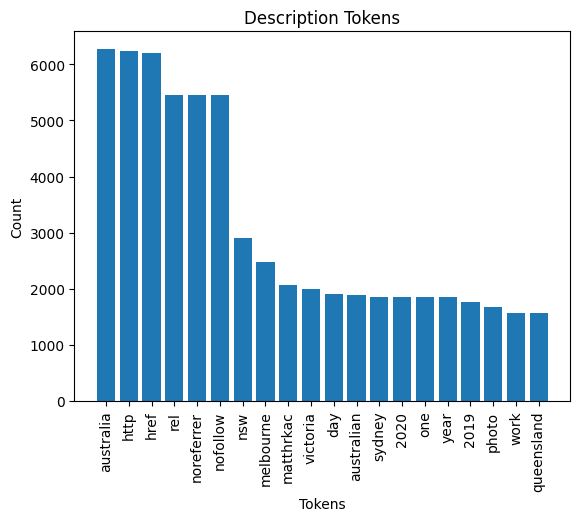

In [81]:
import matplotlib.pyplot as plt

# Plot the frequency of 'description' tokens
plt.bar(desc_tokens_plot['desc_tokens'], desc_tokens_plot['count'])
plt.xticks(rotation=90)
plt.title('Description Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.show()

After preprocessing and exploring 'Description' column, tokens related to Australia, including <b> 'australia', 'nsw', 'melbourne', 'victoria', 'sydney', 'australian, </b> and <b> 'queensland' </b>, were observed to have high frequencies in the bar chart.
<br>
Moreover, time-related tokens, including <b> '2020', 'year' </b> and <b> '2019' </b>
also appeared prominently in the frequency distribution. HTML-related or website-related tokens, including <b> 'http', 'href', 'noreferrer', </b> and <b> 'rel' </b> were identified as elements of embedded links rather than meaningful content.
<br>
These tokens indicate that users may attach website links within descriptions. Therefore, these tokens and non-informative tokens were filtered out.

In [82]:
noise_tokens = {
    'http', 'https', 'www', 'href', 'rel', 'nofollow', 'noreferrer', 'org', 'new',
    'com', 'html', 'around', 'one'
}

combined_df_copy01['desc_tokens_no_noise'] = (
    combined_df_copy01['desc_tokens']
    .apply(lambda tokens: [t for t in tokens if t not in noise_tokens])
)

In [83]:
# Convert 'description' tokens list into a long format to enable frequency-based analysis
desc_tokens_no_noise_plot = (
    combined_df_copy01['desc_tokens_no_noise']
    .explode()
    .value_counts()
    .reset_index()
    .head(20))

desc_tokens_no_noise_plot

,desc_tokens_no_noise,count
0,australia,6270
1,nsw,2900
2,melbourne,2484
3,matthrkac,2066
4,victoria,1989
5,day,1907
6,australian,1882
7,sydney,1861
8,2020,1860
9,year,1853


#### Insight 2:

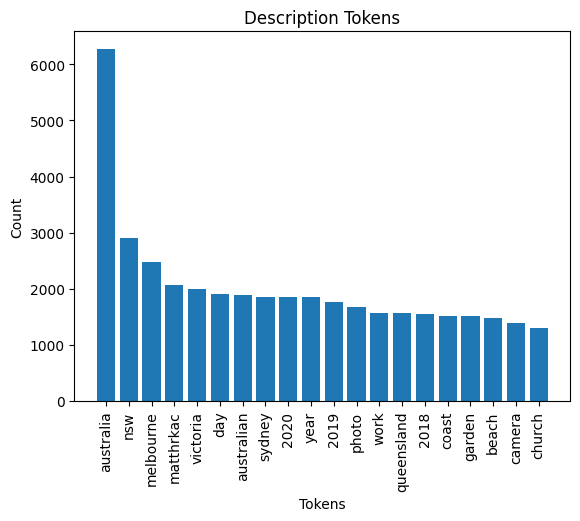

In [84]:
# Plot the frequency of 'description' tokens with out noise
plt.bar(desc_tokens_no_noise_plot['desc_tokens_no_noise'], desc_tokens_no_noise_plot['count'])
plt.xticks(rotation=90)
plt.title('Description Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.show()

After filtering out the none-informative tokens, location-related terms associated with Australia, year-related tokens, and natural or landmark-related terms were observed to have high frequencies in the bar chart.

#### Insight 3:

In [85]:
combined_df_copy01['desc_word_count'] = combined_df_copy01['desc_tokens'].str.len()
combined_df_copy01['desc_word_count'].describe()

,desc_word_count
count,70000.000000
mean,8.769643
std,35.045061
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,1735.000000


Text(0, 0.5, 'Frequency')

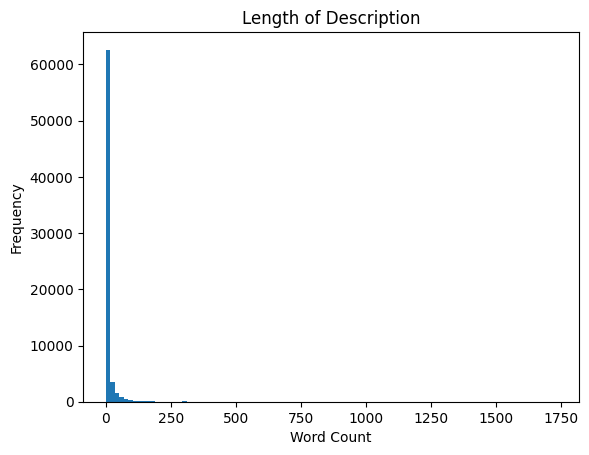

In [86]:
plt.hist(combined_df_copy01['desc_word_count'], bins=100)
plt.title('Length of Description')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Examination of description length indicates that most posts contain short text, whereas a small proportion include substantially longer narratives.

#### EDA of Title

In [87]:
combined_df_copy01['title_tokens'] = combined_df_copy01['Title'].apply(preprocess_txt)

In [88]:
title_tokens_plot = (
    combined_df_copy01['title_tokens']
    .explode()
    .value_counts()
    .reset_index()
    .head(20))

title_tokens_plot.sort_values('count', ascending=False)

,title_tokens,count
0,australia,2769
1,jpg,2737
2,2018,1788
3,2020,1609
4,2019,1582
5,nsw,1380
6,sydney,1329
7,melbourne,1255
8,park,1039
9,sunrise,1027


#### Insight 4:

Examination of tokens in the 'Title' column revealed tokens with fewer than three characters were often non-informative. Therefore, tokens containing fewer than three characters were filtered out.

In [89]:
combined_df_copy01['title_tokens_more2'] = (
    combined_df_copy01['title_tokens']
    .apply(lambda tokens: [token for token in tokens if len(token) > 2])
)

In [90]:
title_tokens_plot = (
    combined_df_copy01['title_tokens_more2']
    .explode()
    .value_counts()
    .reset_index()
    .head(20))

title_tokens_plot.sort_values('count', ascending=False)

,title_tokens_more2,count
0,australia,2769
1,jpg,2737
2,2018,1788
3,2020,1609
4,2019,1582
5,nsw,1380
6,sydney,1329
7,melbourne,1255
8,park,1039
9,sunrise,1027


##### Visualization of raw words in 'Title'

#### Insight 5:

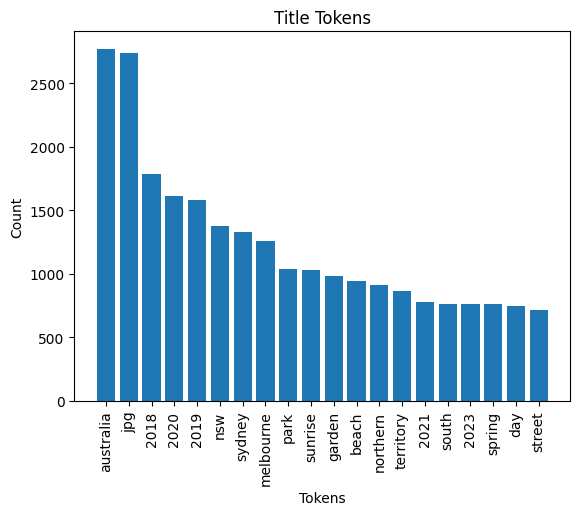

In [91]:
# Plot the frequency of 'Title' tokens
plt.bar(title_tokens_plot['title_tokens_more2'], title_tokens_plot['count'])
plt.xticks(rotation=90)
plt.title('Title Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.show()

After preprocessing and exploring 'Title' column, tokens related to Australia, including <b> 'australia', 'nsw', 'northernterritory',	'sydney', 'southaustralia', 'darwin', 'victoria', </b> and <b> 'westaustralia' </b>, were observed to have high frequencies in the bar chart.
<br>
Moreover, month-related tokens, including <b> 'november', 'december', 'october', </b> and <b> 'september' </b>
and photo-related tokens, including <b> 'img', 'jpg', 'dsc', 'allphotos </b> and <b> 'dscn' </b>
also appeared prominently in the frequency distribution.

The presence of photo-related tokens (e.g., 'img', 'jpg', 'dsc', 'dscn') suggests that the upload function on the Flickr website may automatically assign titles based on the original photo file names. However, the existence of missing values in 'Title' column indicates  that user may have option to edit titles or upload photos without specifying a title.

Moreover, the presence of 'dji' likely reflects images captured using DJI drone devices, whereas tokens like 'dsc' and 'dscn' derive from default digital camera file naming conventions.

#### Insight 6:

In [92]:
combined_df_copy01['title_word_count'] = combined_df_copy01['title_tokens'].str.len()
combined_df_copy01['title_word_count'].describe()

,title_word_count
count,70000.000000
mean,3.406586
std,2.910267
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,33.000000


Text(0, 0.5, 'Frequency')

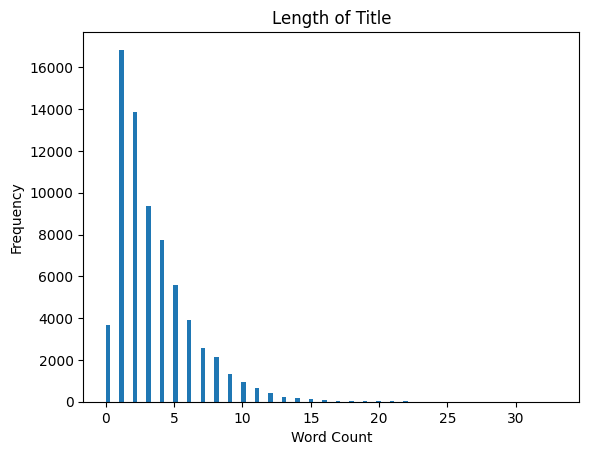

In [93]:
plt.hist(combined_df_copy01['title_word_count'], bins=100)
plt.title('Length of Title')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Examination of title length indicates that most posts contain short titles, whereas a small proportion exceed 20 words.

#### EDA of Tags

In [94]:
combined_df_copy01['tags_tokens'] = combined_df_copy01['Tags'].apply(preprocess_txt)

In [95]:
tags_tokens_plot = (
    combined_df_copy01['tags_tokens']
    .explode()
    .value_counts()
    .reset_index()
    .head(20))

tags_tokens_plot.sort_values('count', ascending=False)

,tags_tokens,count
0,australia,27161
1,nsw,6382
2,victoria,6012
3,newsouthwales,5090
4,queensland,4604
5,l0xpix,4190
6,loxwerx,4149
7,loxpix,4138
8,melbourne,3673
9,landscape,3555


#### Visualization of raw words in 'Tags'

#### Insight 7:

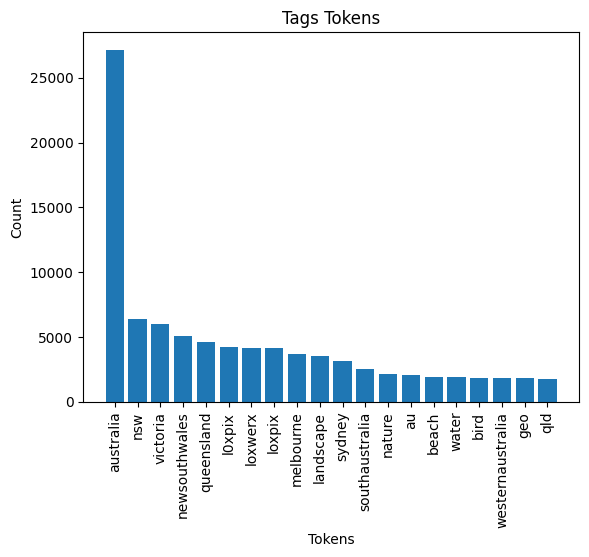

In [96]:
# Plot the frequency of 'Tags' tokens
plt.bar(tags_tokens_plot['tags_tokens'], tags_tokens_plot['count'])
plt.xticks(rotation=90)
plt.title('Tags Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.show()

As the presence of the abbreviated words and full form words, such as queensland and qld, on the frequency bar chart, the abbreviated words need to transform to full form words, to ensure the accuracy of the intepretation of tags.

In [97]:
# Replace words to support analysis
full_words_map = {
    'au': 'australia',
    'nsw': 'newsouthwales',
    'vic': 'victoria',
    'qld': 'queensland',
    'sa': 'southaustralia',
    'wa': 'westernaustralia',
    'tas': 'tasmania',
    'act': 'australiancapitalterritory',
    'nt': 'northernterritory'
}

In [98]:
# Replace abbreviated tokens with full words to improve consistency
combined_df_copy01['tags_tokens_fullwords'] = combined_df_copy01['tags_tokens'].apply(
    lambda tokens:(
        [full_words_map.get(token, token) for token in tokens]
    )
)

In [99]:
tags_tokens_full_plot = (
    combined_df_copy01['tags_tokens_fullwords']
    .explode()
    .value_counts()
    .reset_index()
    .head(20))

tags_tokens_full_plot.sort_values('count', ascending=False)

,tags_tokens_fullwords,count
0,australia,29213
1,newsouthwales,11472
2,queensland,6366
3,victoria,6153
4,l0xpix,4190
5,loxwerx,4149
6,loxpix,4138
7,melbourne,3673
8,landscape,3555
9,southaustralia,3241


#### Insight 8:

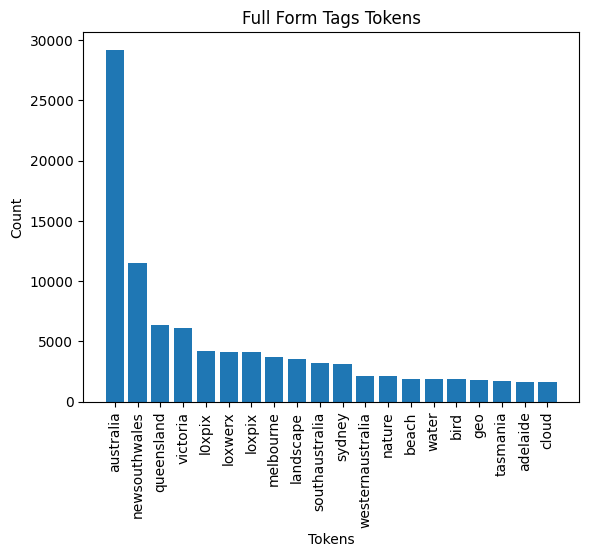

In [100]:
# Plot the frequency of 'Tags' tokens
plt.bar(tags_tokens_full_plot['tags_tokens_fullwords'], tags_tokens_full_plot['count'])
plt.xticks(rotation=90)
plt.title('Full Form Tags Tokens')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.show()

Following preprocessing and exploring 'Tags' column, tokens related to Australia, including <b> 'australia', 'newsouthwales', 'queensland', 'victoria',	'melbourne', 'southaustralia', 'sydney', 'westaustralia', 'tasmania', </b> and <b> 'adelaide' </b>, were observed to have high frequencies in the bar chart.
<br>
Moreover, natural-related tokens, including <b> 'landscape', 'nature', 'beach', 'water', 'bird' </b> and <b> 'cloud' </b>
and username-related tokens, including <b> 'loxwerx', </b> and <b> 'loxpix' </b> also appeared prominently in the frequency distribution.

#### Insight 9:

In [101]:
combined_df_copy01['tags_word_count'] = combined_df_copy01['tags_tokens'].str.len()
combined_df_copy01['tags_word_count'].describe()

,tags_word_count
count,70000.000000
mean,7.286657
std,9.620908
min,0.000000
25%,0.000000
50%,4.000000
75%,11.000000
max,75.000000


Text(0, 0.5, 'Frequency')

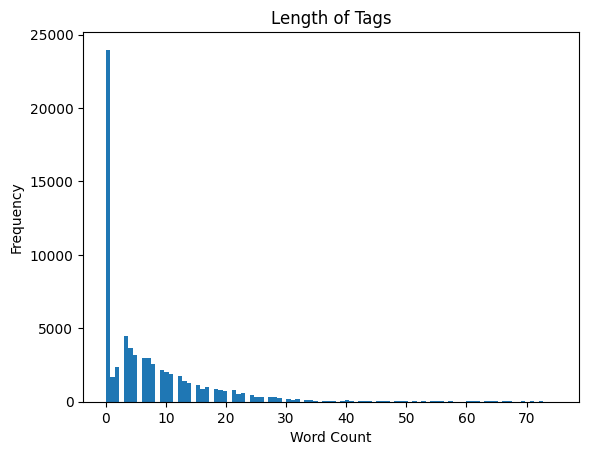

In [102]:
plt.hist(combined_df_copy01['tags_word_count'], bins=100)
plt.title('Length of Tags')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Examination of tag length indicates that most posts contain no tags, whereas a small proportion contained a high number of tags.

### EDA of Geographic Data

'Latitude' and 'Longitude' variables were examined before analysis whether the values is based on real data.to verify that their values fall withih valid grographic coordinate ranges (−90 to 90 for latitude and −180 to 180 for longitude).

#### Insight 10:

In [103]:
# https://learn.microsoft.com/en-us/previous-versions/mappoint/aa578799(v=msdn.10)?redirectedfrom=MSDN
combined_df_copy01[(combined_df_copy01['Longitude'] > 180) | (combined_df_copy01['Longitude'] <= -180)][['Longitude', 'Latitude']]

,Longitude,Latitude


In [104]:
combined_df_copy01[(combined_df_copy01['Latitude'] > 90) | (combined_df_copy01['Latitude'] <= -90)][['Longitude', 'Latitude']]

,Longitude,Latitude


As no invalid values were detected in the 'Latitude' and 'Longitude', the scatter chart was used to illustrate the location of 'Latitude' and 'Longtitude'.

#### Insight 11:

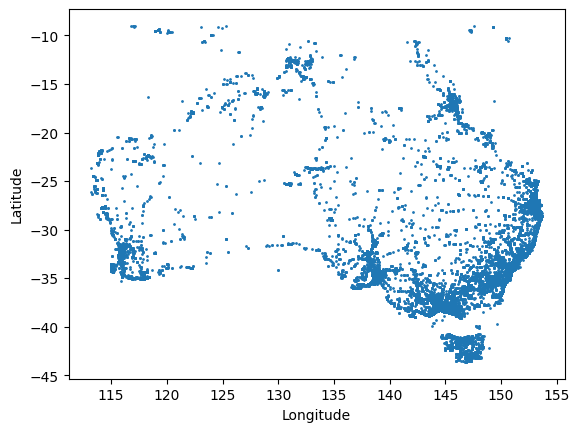

In [105]:
# Check the location of latitude and longitude
plt.scatter(combined_df_copy01['Longitude'], combined_df_copy01['Latitude'], s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatter plot of 'Latitude' and 'Longitude' illustrates that most points form a spatial pattern consistent with geographic outline of Australia.

To confirm that most points lie within Australia, we examine whether any points fall outside the geographic boundary of Australia.

#### Insight 12:

In [106]:
not_aus_bound = combined_df_copy01[(combined_df_copy01['Latitude'] > -10) | (combined_df_copy01['Latitude'] <= -44)][['Longitude', 'Latitude']]
not_aus_bound

,Longitude,Latitude
1935,118.959583,-9.490662
2091,149.315850,-9.081000
2537,149.315636,-9.080251
2960,118.959375,-9.490748
3261,120.086059,-9.665738
...,...,...
32960,118.959882,-9.490979
33714,119.221388,-9.460584
33831,116.965587,-9.028621
34143,124.638611,-9.161389


In [107]:
combined_df_copy01[(combined_df_copy01['Longitude'] > 154) | (combined_df_copy01['Longitude'] <= 112)][['Longitude', 'Latitude']]

,Longitude,Latitude


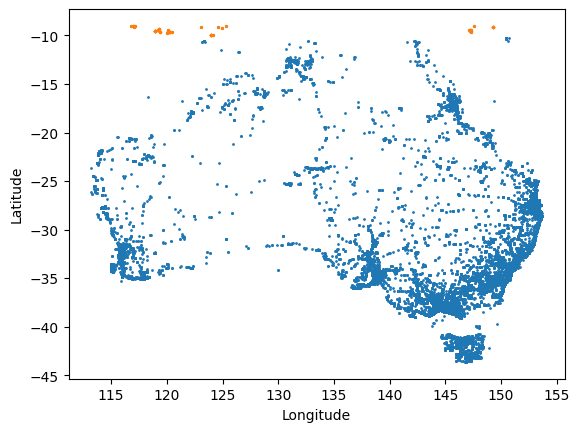

In [108]:
# Check the location of latitude and longitude
plt.scatter(combined_df_copy01['Longitude'], combined_df_copy01['Latitude'], s=1)
plt.scatter(not_aus_bound['Longitude'], not_aus_bound['Latitude'], s=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [109]:
mask = (
    (combined_df_copy01['Latitude'] > -10) |
    (combined_df_copy01['Latitude'] <= -44)
)

user_out_bound = combined_df_copy01.loc[mask, ['User_ID', 'Latitude', 'Longitude']].drop_duplicates()
print(user_out_bound.nunique())
user_out_bound.head(10)

User_ID      19
Latitude     54
Longitude    54
dtype: int64


,User_ID,Latitude,Longitude
1935,91872843@N00,-9.490662,118.959583
2091,146607050@N04,-9.081000,149.315850
2537,36274920@N05,-9.080251,149.315636
2960,91872843@N00,-9.490748,118.959375
3261,67008334@N07,-9.665738,120.086059
7592,37641643@N08,-9.506634,147.228791
8073,91872843@N00,-9.460584,119.221388
8694,15029120@N00,-9.445399,147.182646
8801,91872843@N00,-9.643678,119.431155
10294,67008334@N07,-9.958029,123.986206


We identified 54 records (orange points) that fall outside Australia's geographic boundary. Most of these points are located north of Australia. Moreover, records associated with same user often have different 'Latitude' and 'Longitude' values. This indicates that the coordinates reflect photo-level or upload-level location rather than user-level location.

### EDA of normalized Country and City columns

#### Normalizing 'Country' column

Before analysing the 'Country' variables, its values were cleaned and examined to ensure validity and consistency.

In [110]:
# Clean 'Country' column
combined_df_copy01['Country_clean'] = (
    combined_df_copy01['Country']
    # Remove leading and trailing whitespace
    .str.strip()
    # Remove .
    .str.replace(r'\.', '', regex=True)
    # Remove internal whitespace
    .str.replace(r'\s+', ' ', regex=True)
    # Convert to lower case
    .str.lower()
)

#### Insight 13:

In [111]:
# Observe the valuse of 'Country' column
combined_df_copy01['Country_clean'].unique()

array(['australia', None, 'england', 'usa', 'united states', 'au',
       'hungary', 'canada', 'uk', 'germany', 'united kingdom',
       'tropical queensland', 'new zealand', 'aus', 'scotland',
       'tasmania australia', 'argentina', 'western australia',
       'south australia', 'china', 'españa', 'switzerland', 'austrtalia',
       'singapore', 'luxembourg', 'spain/ australia', 'south wales',
       'belgium', 'deutschland', 'the netherlands',
       'basque country - euskal herria - euskadi', 'belarus', 'taiwan',
       'nederland', 'france',
       'united kingdom of great britain and northern ireland', 'russia',
       'sydney', 'brasil', 'indonesia', 'planet earth', 'chile',
       'ireland', 'australien', 'south korea', '(the land) down under',
       'norway', 'czech republic', '台灣/taiwan', 'thailand', 'nz',
       'italia', 'italy', 'portugal', 'earth',
       'uk (incl northern ireland)', 'oz', 'sweden', 'netherlands',
       'malaysia', 'aussie', '日本', 'japan', 'de', 'phil

'Country' fields contained multiple inconsistencies and alternative representation. Invalid values were corrected and different versions of the same country name were standardised to a consistent format.

In [112]:
replace_country_map = {
    'au': 'australia',
    'aussie': 'australia',
    'aus': 'australia',
    'aust': 'australia',
    'tasmania australia': 'australia',
    'south australia': 'australia',
    'western australia': 'australia',
    'austrtalia': 'australia',
    'australien': 'australia',
    'sydney': 'australia',
    'queensland, australia': 'australia',
    'australiaa': 'australia',
    'australlia': 'australia',
    'victoria, australia': 'australia',
    'a u s t r a l i a': 'australia',
    'queensland australia': 'australia',
    'tropical queensland': 'australia',
    'oz': 'australia',
    'úc': 'australia',
    'tasmania': 'australia',
    'nz': 'new zealand',
    'south wales': 'united kingdom',
    'england, uk': 'united kingdom',
    'england': 'united kingdom',
    'uk': 'united kingdom',
    'uk (incl northern ireland)': 'united kingdom',
    'united kingdom of great britain and northern ireland': 'united kingdom',
    'uae': 'united arab emirates',
    'usa': 'united states',
    'us': 'united states',
    '日本': 'japan',
    'danmark': 'denmark',
    'südeifel / deutschland': 'german',
    'deutschland': 'german',
    'de': 'german',
    'nederland': 'netherlands',
    '台灣': 'taiwan',
    '台灣/taiwan': 'taiwan',
    'basque country - euskal herria - euskadi': 'spain',
    'españa': 'spain',
    'espagne': 'spain',
    'españa, unión europea': 'spain',
    'italia': 'italy',
    'nouvelle calédonie': 'france',
    'nouvelle-calédonie': 'france',
}

In [113]:
uninform_country_rec = {
    #country
    'no where important',
    'only by culture',
    '(the land) down under',
    'earth', 'various',
    'planet earth'
}

In [114]:
# Normalize the country valuse
combined_df_copy01['Country_norm'] = combined_df_copy01['Country_clean'].replace(replace_country_map)

# Set uninformative country valuse as  missing values
combined_df_copy01.loc[
    combined_df_copy01['Country_norm'].isin(uninform_country_rec),
    'Country_norm'
] = np.nan

#### Insight 14:

In [115]:
combined_df_copy01['Country_norm'].unique()

array(['australia', None, 'united kingdom', 'united states', 'hungary',
       'canada', 'germany', 'new zealand', 'scotland', 'argentina',
       'china', 'spain', 'switzerland', 'singapore', 'luxembourg',
       'spain/ australia', 'belgium', 'german', 'the netherlands',
       'belarus', 'taiwan', 'netherlands', 'france', 'russia', 'brasil',
       'indonesia', nan, 'chile', 'ireland', 'south korea', 'norway',
       'czech republic', 'thailand', 'italy', 'portugal', 'sweden',
       'malaysia', 'japan', 'philippines', 'réunion', 'utah, usa',
       'hong kong', 'finland', 'denmark', 'netherlands/ poland',
       'holland', 'dr congo', 'great britain', 'kazakhstan',
       'australia / south africa', 'nepal', 'sri lanka',
       'united arab emirates', 'lesvos, greece', 'estonia', 'korea',
       'egypt', 'shropshire', 'south africa', 'liechtenstein',
       'saudi arabia', 'kanana', 'afghanistan', 'bangladesh',
       'uk/australia', 'papua new guinea', 'poland', 'vietnam', 'nevada

The values in the 'Country' column include multiple countries beyond Australia. This indicates that the 'Country' column is not directly associated with geographic coordinate data.

#### Bar Chart of Country Frequency Distribution

#### Insight 15:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'australia'),
  Text(1, 0, 'united states'),
  Text(2, 0, 'united kingdom'),
  Text(3, 0, 'canada'),
  Text(4, 0, 'new zealand'),
  Text(5, 0, 'luxembourg'),
  Text(6, 0, 'germany'),
  Text(7, 0, 'spain'),
  Text(8, 0, 'singapore'),
  Text(9, 0, 'taiwan')])

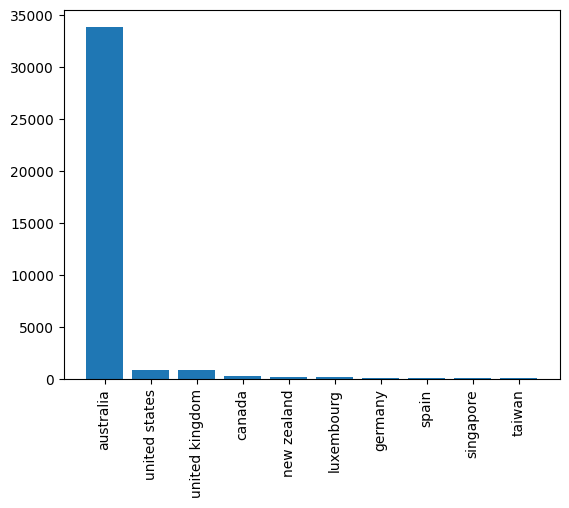

In [116]:
country_size = combined_df_copy01.groupby('Country_norm').size().sort_values(ascending=False).head(10)

plt.bar(country_size.index, country_size)
plt.xticks(rotation=90)

The frequency distribution of 'Country' column demonstrates that Australia is the most commonly reported user country.

#### Normalizing 'City' column

In [117]:
# Clean 'City' column
combined_df_copy01['City_clean'] = (
  combined_df_copy01['City']
  # Trim leading and trailing whitespace
  .str.strip()
  # Remove .
  .str.replace(r'\.', '', regex=True)
  # Remove internal whitespace
  .str.replace(r'\s+', ' ', regex=True)
  # Convert to lower case
  .str.lower()
)

#### Insight 16:

In [180]:
# Observe the valuse of 'City' column
combined_df_copy01['City_clean'].unique()

array(['melbourne', None, 'toowoomba', 'brisbane', 'adelaide', 'sydney',
       'woy woy', 'armidale, nsw', 'philadelphia', 'mullumbimby, nsw',
       'brisbane, queensland', 'san francisco',
       'durack, northern territory', 'port macquarie',
       'far north queensland australia', 'san diego', 'kangaroo flat',
       'canberra', 'one mile beach nsw', 'darwin, northern territory',
       'melbourne, australia', 'worldwide', 'bethanga, victoria', 'perth',
       'grovedale', 'sydney, nsw', 'ottawa', 'hobart', 'ballarat',
       'seattle', 'wollongong', 'launceston', 'oxford',
       'geelong / melbourne', 'eden', 'blue mountains', 'anglesea',
       'beaconsfield', 'hazelbrook, nsw', 'spennymoor', 'seattle, wa',
       'fnq ( mostly far north qld)', 'wagga wagga', 'cassowary coast',
       'massapequa, ny', 'oakland', 'copacabana', 'bagneres de bigorre',
       'taipei', 'toowoomba, queensland', 'albany', 'moruya heads, nsw',
       'glasgow', 'ipswich', 'longford tasmania',
      

'City' fields contained multiple inconsistencies and alternative representation. Invalid values were corrected and different versions of the same country name were standardised to a consistent format. Furthermore, multi-level location entries (such as “Mandurah, Western Australia”) were simplified to their highest-level geographic unit (such as state level) to ensure consistency in analysis.

In [119]:
replace_city_map = {
    'one mile beach nsw': 'new south wales',
    'narellan, nsw australia': 'new south wales',
    'the city never sleep jakarta': 'jakarta',
    'geelong / melbourne': 'melbourne',
    'darwin, northern territory': 'northern territory',
    '高雄/kaohsiung': 'kaohsiung',
    '高雄': 'kaohsiung',
    'on the way to cairns': 'cairns',
    "sydney, hills district - with my favourite cafes being at castle towers, but also 'salt' at round corner, dural, and 'redleaf piccolo' at wahroonga, as well as 'patina cafe', opposite wahroonga park, and, in hornsby, the 'coffee emporium' in westfield.": 'sydney',
    's y d n e y': 'sydney',
    'broadview, adelaide': 'adelaide',
    'moscow region': 'moscow',
    'brisbane, australia': 'brisbane',
    'Kuala Lumpur': 'kuala lumpur',
    'kl': 'kuala lumpur',
    '30307': 'georgia',
    '東京': 'tokyo',
    '한국의 끝자락 진도': 'jindo',
    'western australia': 'perth western australia',
    'hong kong sar': 'hong kong',
    'hong kong, sar': 'hong kong',
    'employed in leipzig (saxony)': 'saxony, leipzig',
    'girona (spain)': 'girona',
    'townsville, australia': 'townsville',
    'illawarra nsw': 'new south wales',
    'newcastle nsw australia': 'new south wales',
    'hobart,': 'hobart',
    'roseville mn': 'minnesota',
    'adelaide, south australia, southern hemisphere, earth, milkyway, universe 1': 'south australia',
    'bulla melbourne': 'melbourne',
    'seattle, wa (sea)': 'west australia',
    '115 humphreys rd, kincumber south, nsw 2251': 'new south wales',
    'sydney nsw 2052': 'new south wales',
    'ipswich queensland': 'queensland',
    'albury nsw au': 'new south wales',
    'near brisbane, queensland': 'brisbane',
    'brisbane australia': 'brisbane',
    'redland bay brisbane': 'brisbane',
    'brisbane, turrball country': 'brisbane',
    'fountaindale nsw': 'new south wales',
    'taipei, taiwan': 'taipei',
    'new york city': 'new york',
    'københavn k': 'copenhagen',
    'naarm (melbourne)': 'melbourne',
    'naarm [melbourne]': 'melbourne',
    'mid north coast nsw': 'new south wales',
    'cassowary coast': 'queensland',
    'red cliffs victoria': 'victoria',
    'auckland, nz': 'auckland',
    'lavington nsw': 'new south wales',
    'central coast, nsw, australia': 'new south wales',
    'yarra valley (melbourne)': 'melbourne'
}

In [120]:
uninform_city_rec = {
    #city
    'to view video, click on the link',
    'on a quest to discover the world',
    'new haven', 'xxxxxxx',
    'anywhere but here!',
    'white horse dick',
    'nancy (54)', '504',
    'the world', 'all over the world'
}

In [121]:
# Normalize 'City' and 'Country' column
combined_df_copy01['City_norm'] = combined_df_copy01['City_clean'].replace(replace_city_map)

In [122]:
# Set uninformative city valuse as  missing values
combined_df_copy01.loc[
    combined_df_copy01['City_norm'].isin(uninform_city_rec),
    'City_norm'
] = np.nan

#### Insight 17:

In [123]:
# Observe the valuse of 'City' column
combined_df_copy01['City_norm'].unique()

array(['melbourne', None, 'toowoomba', 'brisbane', 'adelaide', 'sydney',
       'woy woy', 'armidale, nsw', 'philadelphia', 'mullumbimby, nsw',
       'brisbane, queensland', 'san francisco',
       'durack, northern territory', 'port macquarie',
       'far north queensland australia', 'san diego', 'kangaroo flat',
       'canberra', 'new south wales', 'northern territory',
       'melbourne, australia', 'worldwide', 'bethanga, victoria', 'perth',
       'grovedale', 'sydney, nsw', 'ottawa', 'hobart', 'ballarat',
       'seattle', 'wollongong', 'launceston', 'oxford', 'eden',
       'blue mountains', 'anglesea', 'beaconsfield', 'hazelbrook, nsw',
       'spennymoor', 'seattle, wa', 'fnq ( mostly far north qld)',
       'wagga wagga', 'queensland', 'massapequa, ny', 'oakland',
       'copacabana', 'bagneres de bigorre', 'taipei',
       'toowoomba, queensland', 'albany', 'moruya heads, nsw', 'glasgow',
       'ipswich', 'longford tasmania',
       "sydney, hills district - with my favo

Bar Chart of City Frequency Distribution

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'melbourne'),
  Text(1, 0, 'brisbane'),
  Text(2, 0, 'sydney'),
  Text(3, 0, 'adelaide'),
  Text(4, 0, 'canberra'),
  Text(5, 0, 'perth'),
  Text(6, 0, 'woy woy'),
  Text(7, 0, 'hobart'),
  Text(8, 0, 'northern territory'),
  Text(9, 0, 'durack, northern territory')])

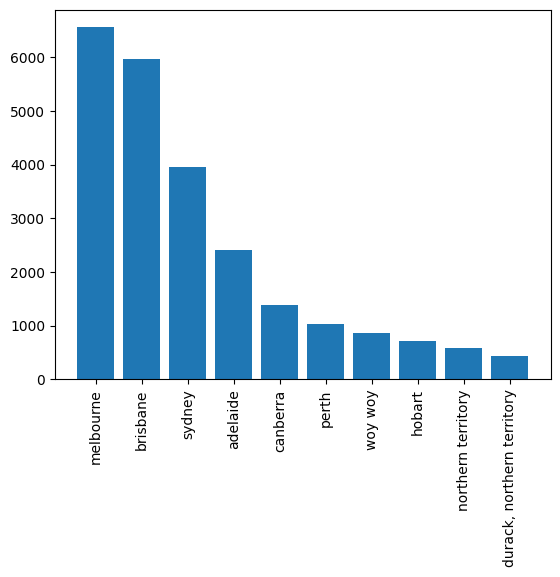

In [124]:
city_size = combined_df_copy01.groupby('City_norm').size().sort_values(ascending=False).head(10)

plt.bar(city_size.index, city_size)
plt.xticks(rotation=90)

The city frequency bar chart indicates that most users are located in Australian states and cities.

### EDA of Date-Time Columns

#### Date-Time Normalization

Three datetime-related columns, including 'Taken_Date', 'Min_Taken_Date', and 'Post_Date', were examined to identify the differences and interpret their respective roles within the dataset.



In [125]:
combined_df_copy01[['Taken_Date', 'Min_Taken_Date', 'Post_Date']].dtypes

,0
Taken_Date,datetime64[ns]
Min_Taken_Date,datetime64[ns]
Post_Date,datetime64[ns]


In [126]:
# Check the differences between three date columns
combined_df_copy01[['Min_Taken_Date', 'Taken_Date', 'Post_Date']].head(30)

,Min_Taken_Date,Taken_Date,Post_Date
0,2022-04-05,2022-04-05 13:25:36,2022-04-08 10:21:59
1,2018-05-02,2018-05-03 12:57:16,2018-05-20 16:19:47
2,2021-11-23,2021-11-23 19:50:27,2021-12-30 11:54:31
3,2019-03-11,2019-03-11 14:47:02,2019-05-05 19:07:25
4,2020-05-14,2020-05-14 15:30:06,2020-05-16 03:02:19
5,2019-04-13,2019-04-13 13:34:14,2019-04-27 05:25:32
6,2018-11-18,2018-11-18 14:40:55,2018-12-02 07:47:49
7,2020-05-04,2020-05-05 07:05:32,2020-05-05 01:49:43
8,2021-03-09,2021-03-09 22:15:33,2021-05-13 06:32:40
9,2020-08-10,2020-08-11 12:15:05,2020-08-11 22:31:46


In [127]:
time_cols = ['Taken_Date', 'Min_Taken_Date', 'Post_Date']
new_time_cols = ['Taken_Date_onlydate', 'Min_Taken_Date_onlydate', 'Post_Date_onlydate']

for old_col, new_col in zip(time_cols, new_time_cols):
  combined_df_copy01[new_col] = combined_df_copy01[old_col].dt.date

#### Insight 18:

In [128]:
combined_df_copy01[(combined_df_copy01['Taken_Date_onlydate'] != combined_df_copy01['Min_Taken_Date_onlydate'])][['Taken_Date', 'Min_Taken_Date_onlydate']].head(20)

,Taken_Date,Min_Taken_Date_onlydate
1,2018-05-03 12:57:16,2018-05-02
7,2020-05-05 07:05:32,2020-05-04
9,2020-08-11 12:15:05,2020-08-10
14,2023-10-24 06:04:16,2023-10-23
18,2018-04-22 12:57:06,2018-04-21
28,2019-07-28 05:54:49,2019-07-27
37,2020-01-16 06:45:53,2020-01-15
41,2019-11-05 12:03:35,2019-11-04
45,2019-03-09 12:57:23,2019-03-08
48,2023-01-26 12:28:07,2023-01-25


Comparison between Taken_Date and Min_Taken_Date demonstrate that the two fields share the same date in most records.
<br>
However, in some instances, 'Min_Taken_Date' is one day earlier than 'Taken_Date', indicateing 'Min_Taken_Date' might be a system-generated or extract date from photo files. Since 'Min_Taken_Date' is completed and closely reflects 'Taken_Date', missing entries in 'Taken_Date' were replaced with values from 'Min_Taken_Date'.

In [129]:
combined_df_copy01['Taken_Date_complete'] = combined_df_copy01['Taken_Date'].fillna(combined_df_copy01['Min_Taken_Date'])

The time difference between 'Taken_Date' and 'Post_Date' was computed as 'lag_sec' to  quantify posting latency. This lag represents the time interval between when photo was taken and it was post to the platform, providing insight about behavioural analysis of user posting patterns (e.g., immediate uploads versus delayed sharing).

In [130]:
combined_df_copy01[['Taken_Date', 'Post_Date']][combined_df_copy01['Taken_Date'] > combined_df_copy01['Post_Date']]

,Taken_Date,Post_Date
7,2020-05-05 07:05:32,2020-05-05 01:49:43
15,2019-12-17 22:38:26,2019-12-17 11:58:03
28,2019-07-28 05:54:49,2019-07-27 23:18:15
42,2023-03-19 10:35:28,2023-03-19 07:12:16
47,2019-08-25 09:59:18,2019-08-25 02:24:10
...,...,...
34977,2020-10-20 07:02:58,2020-10-19 20:37:34
34985,2018-02-20 00:01:30,2018-02-19 13:05:48
34995,2019-07-13 12:27:31,2019-07-13 05:47:58
34998,2018-11-07 10:49:44,2018-11-07 08:58:20


In [131]:
# Check how long users upload or post their photoes after taking the photoes
combined_df_copy01['lag_sec'] = (combined_df_copy01['Post_Date']-combined_df_copy01['Taken_Date'])

In [132]:
combined_df_copy01['lag_sec'].describe()

,lag_sec
count,69193
mean,47 days 03:00:25.954850923
std,151 days 22:29:49.226685170
min,-4737 days +15:29:32
25%,0 days 08:00:00
50%,4 days 10:38:38
75%,31 days 13:13:36
max,1572 days 10:18:14


To facilitate the downstream analysis, 'lag_sec' was converted FROM second to hour.

In [133]:
combined_df_copy01['lag_hr'] = (
    pd.to_timedelta(combined_df_copy01['lag_sec'])
    .dt.total_seconds() / 3600
)

In [134]:
combined_df_copy01['lag_hr'].describe()

,lag_hr
count,69193.000000
mean,1131.007210
std,3646.497007
min,-113672.507778
25%,8.000000
50%,106.643889
75%,757.226667
max,37738.303889


To further examine postinf behaviour, records were categorised based on the computed time lag. Negative values indicate the recorded posting time occured earlier thatn the taken time, while positive values indicate dalayed uploads occurring after the photo was taken.

In [135]:
precreate = combined_df_copy01[combined_df_copy01['lag_hr'] < 0]
delayed = combined_df_copy01[combined_df_copy01['lag_hr'] > 0]

#### Insight 19:

Text(0.5, 1.0, 'Taken Before Post (hours)')

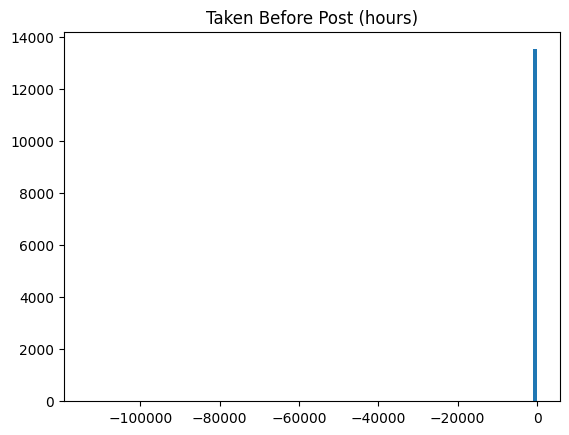

In [136]:
plt.hist(precreate['lag_hr'], bins=100)
plt.title('Taken Before Post (hours)')

Text(0.5, 1.0, 'Taken AFTER Post (hours)')

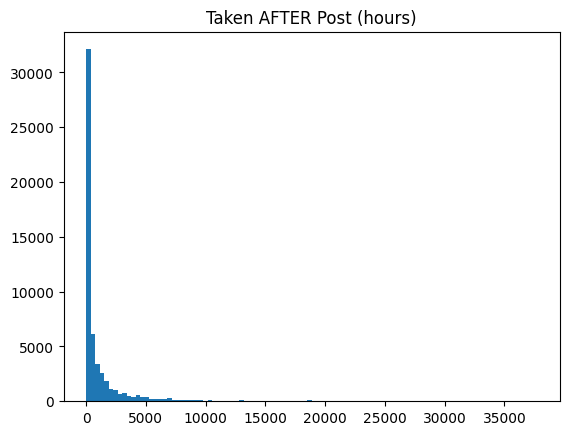

In [137]:
plt.hist(delayed['lag_hr'], bins=100)
plt.title('Taken AFTER Post (hours)')

The lag between 'Taken_Date' and 'Post_Date' demonstrates a strongly right-skewed distribution. Most photos were upload suddenly or uploaded shortly after being taken.
<br>
A small proportion of records show negative lag values, likely due to data quality issues, manual time edits by users, or timezone misalignments during data processing.

### EDA of DateTime Data Grouped by User_ID

The dataset was aggregated by User_ID to convert photo-level observations into user-level observations, enabling subsequent analysis about behavioural patterns.
<br>
These include activity duration (time_span), posting frequency (post_count), median upload delay (lag_time), and peak posting hour (peak_post_time).

In [138]:
combined_df_copy01['post_hour'] = combined_df_copy01['Post_Date'].dt.hour
combined_df_copy01['post_month'] = combined_df_copy01['Post_Date'].dt.month

In [140]:
user_web_time = (combined_df_copy01.groupby('User_ID')
  .agg(
      first_seen = ('Post_Date', 'min'),
      last_seen = ('Post_Date', 'max'),
      time_span = ('Post_Date', lambda x: (x.max() - x.min()).days),
      lag_time =('lag_hr', 'median'),
      post_count = ('Post_ID', 'count'),
      peak_post_time = ('post_hour', lambda hr: hr.mode().iloc[0]),
      len_desc = ('desc_word_count', 'mean'),
      len_title = ('title_word_count', 'mean'),
      len_tags = ('tags_word_count', 'mean')
  )
)

user_web_time.sort_values('post_count', ascending=False).head(10)

,first_seen,last_seen,time_span,lag_time,post_count,peak_post_time,len_desc,len_title,len_tags
User_ID,,,,,,,,,
127449591@N07,2018-01-07 06:38:37,2023-12-20 06:39:17,2173,354.792778,4117,7,2.660432,1.904785,22.481904
89165847@N00,2018-02-12 21:33:50,2024-03-03 06:20:02,2210,1603.747778,1136,10,0.314261,2.422535,7.623239
185568162@N05,2020-07-13 08:58:37,2021-05-04 07:24:12,294,8.018333,1049,9,14.798856,7.702574,7.638704
48583839@N07,2018-01-02 11:36:27,2024-01-19 11:49:37,2208,282.987222,1034,12,0.011605,4.265957,10.071567
44489466@N00,2018-02-03 04:15:20,2023-12-31 09:07:32,2157,34.230000,997,5,3.044132,10.804413,1.282849
51304257@N03,2018-10-04 13:14:15,2023-11-08 04:36:13,1860,424.960556,986,11,0.027383,2.000000,3.996957
54476947@N08,2018-01-20 06:24:29,2023-12-24 05:34:14,2163,18.270833,975,6,6.670769,2.308718,0.311795
187097222@N05,2020-02-24 01:50:10,2023-10-17 10:27:47,1331,3.600972,896,14,41.131696,5.373884,13.790179
73561613@N06,2018-01-02 03:28:24,2024-05-05 09:56:17,2315,337.348333,867,9,10.754325,5.161476,27.607843


To examine the relationship between the post count and other features, a correlation analysis was conducted using .corr() function.

<Axes: >

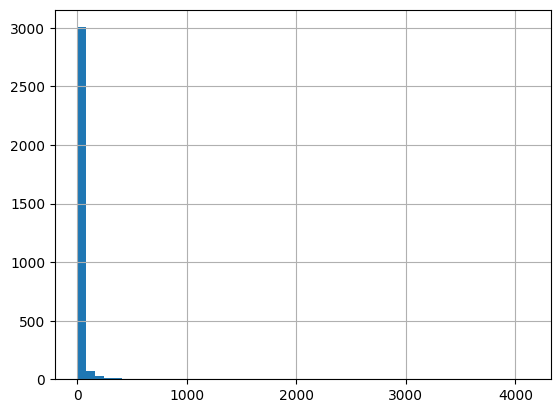

In [141]:
user_web_time['post_count'].hist(bins=50)

<Axes: >

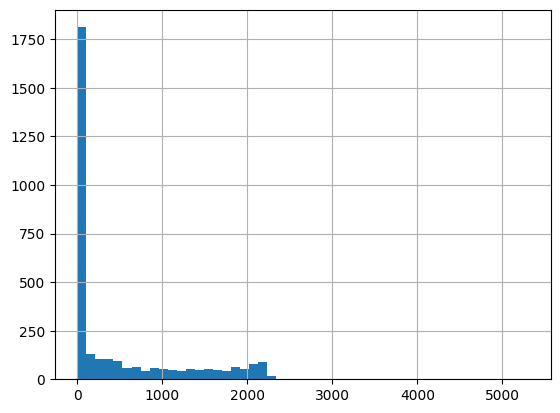

In [142]:
user_web_time['time_span'].hist(bins=50)

<Axes: >

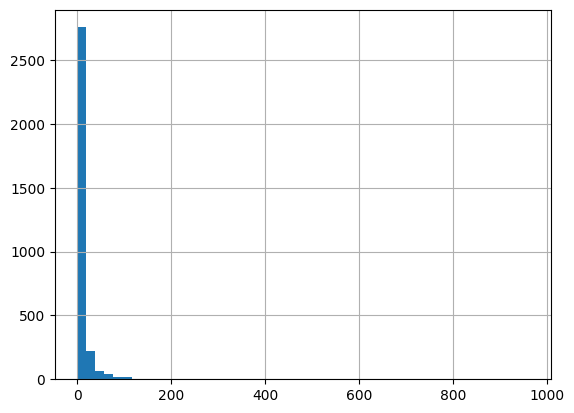

In [143]:
user_web_time['len_desc'].hist(bins=50)

<Axes: >

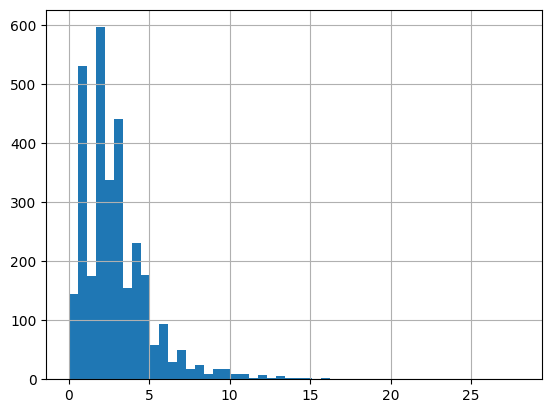

In [144]:
user_web_time['len_title'].hist(bins=50)

<Axes: >

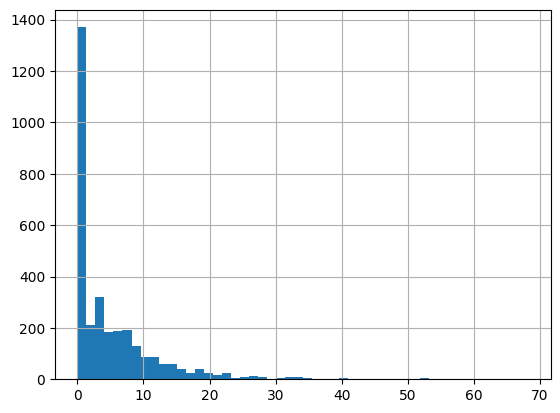

In [145]:
user_web_time['len_tags'].hist(bins=50)

Because 'time_span', 'post_count', 'len_desc', 'len_title', and 'len_tags' exhibited right-skewed distributions, log1p was applied to reduce skewness before computing correlations.

In [146]:
user_web_time['log_time_span'] = np.log1p(user_web_time['time_span'])
user_web_time['log_post_count'] = np.log1p(user_web_time['post_count'])
user_web_time['log_len_desc'] = np.log1p(user_web_time['len_desc'])
user_web_time['log_len_title'] = np.log1p(user_web_time['len_title'])
user_web_time['log_len_tags'] = np.log1p(user_web_time['len_tags'])

<Axes: >

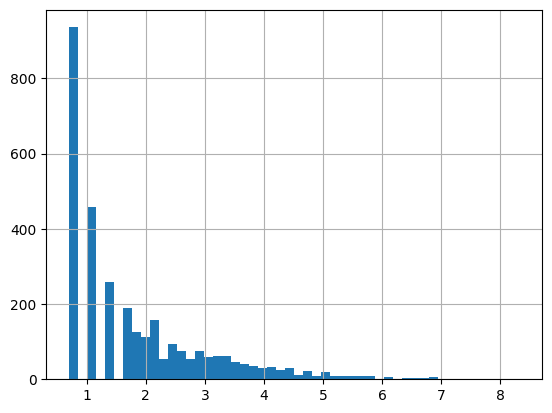

In [147]:
user_web_time['log_post_count'].hist(bins=50)

<Axes: >

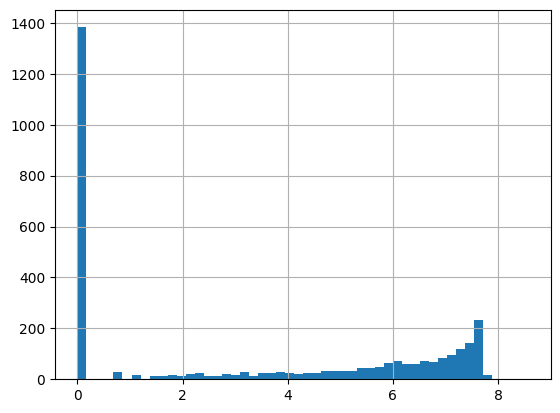

In [148]:
np.log1p(user_web_time['time_span']).hist(bins=50)

<Axes: >

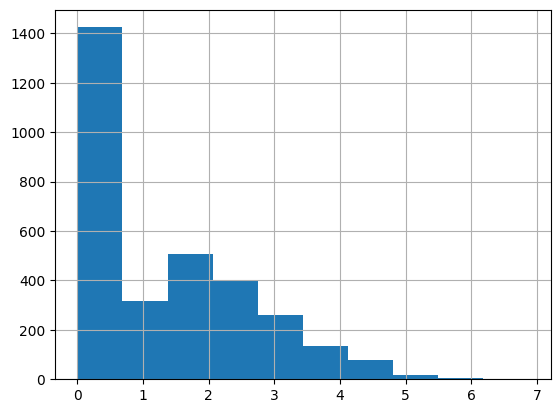

In [149]:
user_web_time['log_len_desc'].hist()

<Axes: >

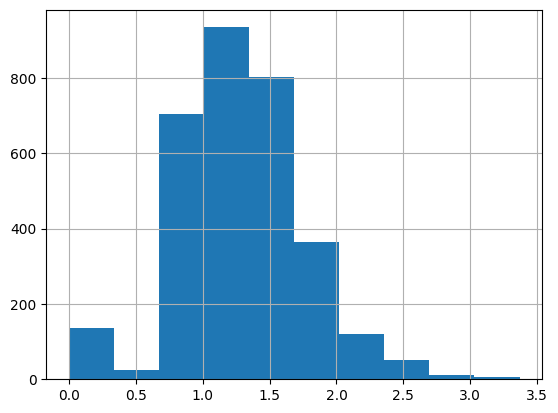

In [150]:
user_web_time['log_len_title'].hist()

#### Insight 20:

In [151]:
user_web_time[['log_post_count', 'log_time_span', 'lag_time', 'peak_post_time', 'log_len_desc', 'log_len_title', 'log_len_tags']].corr()

,log_post_count,log_time_span,lag_time,peak_post_time,log_len_desc,log_len_title,log_len_tags
log_post_count,1.000000,0.694804,-0.025873,-0.015239,0.044178,0.094697,0.094138
log_time_span,0.694804,1.000000,-0.062733,-0.133905,0.158569,0.132252,0.140407
lag_time,-0.025873,-0.062733,1.000000,0.052435,-0.006804,-0.000201,-0.019413
peak_post_time,-0.015239,-0.133905,0.052435,1.000000,-0.030472,-0.034242,-0.028869
log_len_desc,0.044178,0.158569,-0.006804,-0.030472,1.000000,0.307416,0.420708
log_len_title,0.094697,0.132252,-0.000201,-0.034242,0.307416,1.000000,0.241905
log_len_tags,0.094138,0.140407,-0.019413,-0.028869,0.420708,0.241905,1.000000


The correlation analysis indicates a strong positive association between posting frequency and time spending on the website. The moderate correlations were observed among textual features, between description length and tag usage, showing that users whi write more also tend to use more tags.

#### Clustering the user based on their behavious

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [153]:
# Scale the features
x = user_web_time[['time_span', 'lag_time', 'post_count', 'len_desc', 'len_title', 'len_tags']]
x = StandardScaler().fit_transform(x)

We apply the time period since first day to last day using web, the time period between they taking and posting photo and the number of posts to cluster user.

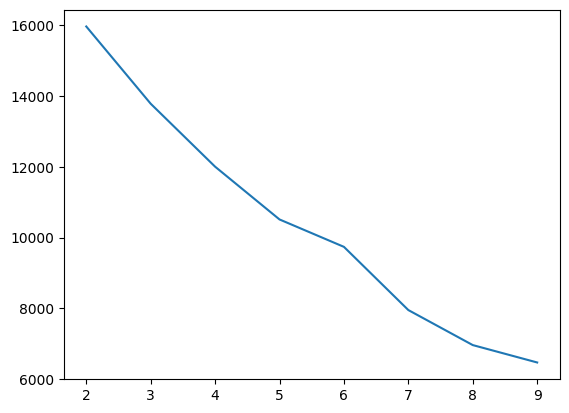

In [190]:
cluster = []
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  km.fit(x)
  cluster.append(km.inertia_)

plt.plot(range(2, 10), cluster)

In [155]:
kmeans = KMeans(n_clusters=5, random_state=42)
user_web_time['Cluster'] = kmeans.fit_predict(x)

cluster_df = user_web_time.groupby('Cluster')[[
    'time_span', 'lag_time', 'post_count', 'len_desc', 'len_title', 'len_tags'
]].mean()

In [156]:
user_web_time['Cluster'].value_counts()

,count
Cluster,
0,2216
1,653
4,272
3,10
2,1


In [157]:
cluster_df.head(10)

,time_span,lag_time,post_count,len_desc,len_title,len_tags
Cluster,,,,,,
0,122.893953,1521.016321,6.200812,4.895870,2.532350,3.387554
1,1668.923430,534.168262,73.802450,7.742420,2.885591,5.474418
2,2173.000000,354.792778,4117.000000,2.660432,1.904785,22.481904
3,511.700000,-76838.036819,2.200000,4.650000,2.725000,9.950000
4,360.003676,2170.042829,11.474265,54.257686,6.587680,19.547259


#### Insight 21:

We selected five clusters for interpretability. The details of each cluster are provided as follows:

Cluster 0 (<b> New users with delayed posting habit </b>): <br>
Users in this cluster have a short platform history and a small number of posts. Their photos are typically taken some time before being uploaded. They tend to write short descriptions and titles and use a relatively few tags.
<br>
<br>
Cluster 1 (<b> New users with delayed posting </b>): <br>
Users in this cluster have a long platform history and a moderate number of posts. Their photos are uploaded within a moderate time gap after being taken. Text engagement is relatively low to moderate, with short descriptions, short titles, and relatively few tags.
<br>
<br>
Cluster 2 (<b> Highly active long-term contributors. </b>): <br>
Users in this cluster have a long platform history and a large number of posts. Their photos are typically taken small time before being uploade. They tend to write short descriptions and titles and use a relatively large number of tags.
<br>
<br>
Cluster 3 (<b> Low-activity users with anomalous timestamps </b>): <br>
Users in this cluster have a medium platform history and a small number of posts. Their photos are typically taken large time gap. They tend to write short descriptions and titles and use a medium number of tags.
<br>
<br>
Cluster 4 (<b> Story-focused users who post with delays </b>):
Users in this cluster have a medium platform history and a small number of posts. Their photos are typically taken large time before being uploade. They tend to write long descriptions, short titles and use a relatively large number of tags.

### EDA of Year and Month Extracted from DateTime Columns

To examine the temporal patterns of posting behaviour, the 'Post_Date' column was analysed to extract the year, month, and hour of posting.

In [158]:
combined_df_copy01['Post_MonthYear'] = combined_df_copy01['Post_Date'].dt.to_period('M')

In [159]:
combined_df_copy01['Post_MonthYear'].head()

,Post_MonthYear
0,2022-04
1,2018-05
2,2021-12
3,2019-05
4,2020-05


In [160]:
monthlyyear_counts =(
    combined_df_copy01
    .groupby('Post_MonthYear')
    .size()
    .reset_index(name='Count_Month_Year')
)

In [161]:
monthlyyear_counts.sort_values('Count_Month_Year', ascending=False).head(10)

,Post_MonthYear,Count_Month_Year
47,2019-09,1506
30,2018-04,1441
42,2019-04,1440
36,2018-10,1410
48,2019-10,1396
53,2020-03,1368
63,2021-01,1343
37,2018-11,1338
38,2018-12,1302
31,2018-05,1283


#### Insight 22:

<Axes: xlabel='Post_MonthYear'>

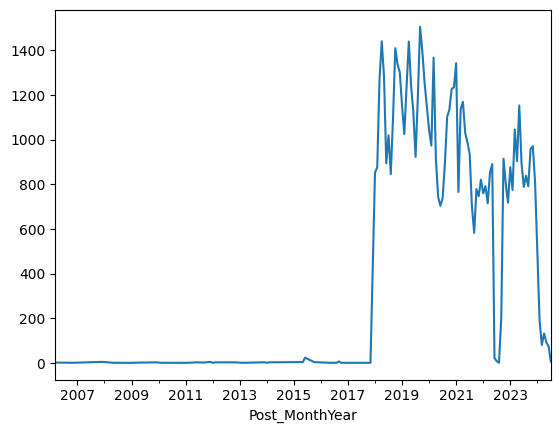

In [162]:
monthlyyear_counts = monthlyyear_counts.sort_values('Post_MonthYear')
monthlyyear_counts = monthlyyear_counts.set_index('Post_MonthYear')

monthlyyear_counts['Count_Month_Year'].plot()

This line chart illustrates the post activity started at 2006 but posting quickly increase at 2018. However, the posting was droped rapidly and increased rapidly again at 2022.

In [163]:
combined_df_copy01['Post_Month'] = combined_df_copy01['Post_Date'].dt.month

In [164]:
monthly_counts =(
    combined_df_copy01
    .groupby('Post_Month')
    .size()
)

#### Insight 23:

<Axes: xlabel='Post_Month'>

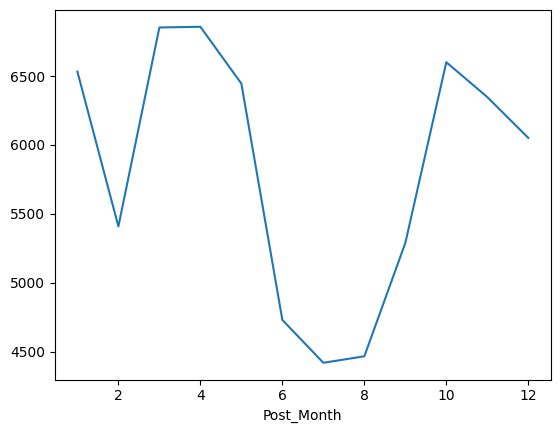

In [165]:
monthly_counts.plot()

This line chart illustrates the photos uploads peak between March to April. After April, posting activity declines, with a sharp decrease in May and reaching its lowest point in July. Then, posting activity increases rapidly from August, before declining again after October.

In [166]:
combined_df_copy01['Post_Time'] = combined_df_copy01['Post_Date'].dt.hour

In [167]:
combined_df_copy01['Post_Time']

,Post_Time
0,10
1,16
2,11
3,19
4,3
...,...
34995,5
34996,9
34997,13
34998,8


In [168]:
post_time_count = (
    combined_df_copy01
    .groupby('Post_Time')
    .size()
)

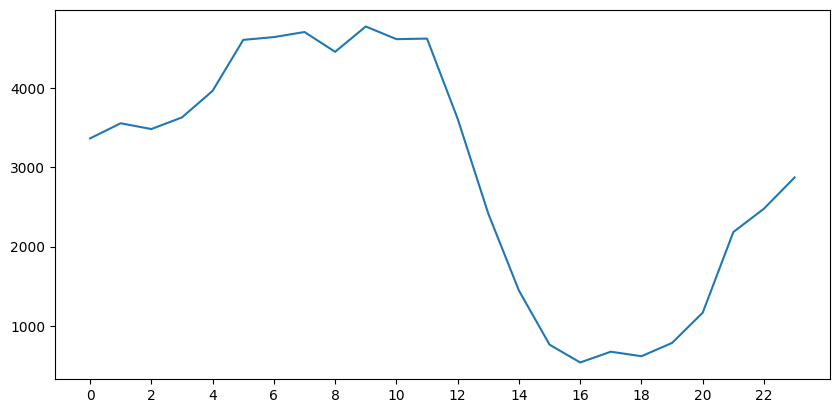

In [169]:
plt.figure().set_figwidth(10)
plt.xticks(range(0, 24, 2))
plt.plot(post_time_count)

This line chart illustrates that post activity peak between morning to noon (05.00-12.00). Posting activity decreases rapidly at midday and raching its lowest level in the mid-afternoon, before increasing again around 16 o'clock.

### Powerful Users Observation

Following the examination of posting times, we investigated whether the results were influenced by power users. Users in the top 1% of posting activity were filtered to assess their influence on the overall distribution.

In [174]:
# Post count per user
user_post_counts = (
    combined_df_copy01
    .groupby('User_ID')['Post_ID']
    .nunique()
    .rename('post_count')
)

# Define power users (top 1%)
threshold = user_post_counts.quantile(0.99)
power_users = user_post_counts[user_post_counts >= threshold].index


In [175]:
power_user = combined_df_copy01[combined_df_copy01['User_ID'].isin(power_users)]
non_power_user = combined_df_copy01[~combined_df_copy01['User_ID'].isin(power_users)]

#### Insight 24:

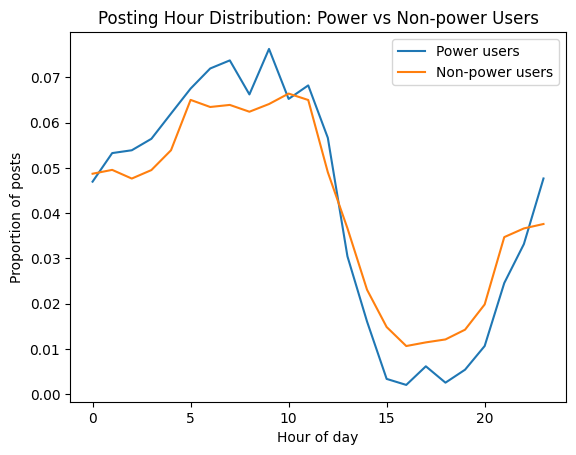

In [176]:
power_hour = power_user['post_hour'].value_counts(normalize=True).sort_index()
non_power_hour = non_power_user['post_hour'].value_counts(normalize=True).sort_index()

plt.figure()
plt.plot(power_hour.index, power_hour.values, label='Power users')
plt.plot(non_power_hour.index, non_power_hour.values, label='Non-power users')
plt.xlabel('Hour of day')
plt.ylabel('Proportion of posts')
plt.title('Posting Hour Distribution: Power vs Non-power Users')
plt.legend()
plt.show()


This line chart compares the hourly posting distribution between powerful users and non-powerful users. Both groups reveal a similar daily posting pattern.
<br>
Powerful users generally demonstrate slightly higer posting proportions during peak morning hours and slightly lower posting proportions during late afternoon hours compared to non-powerful users.
<br>
Overall, although small differences, powerful and non-powerful users post at similar time, indicating that busy period aren't caused mainly by power users alone.

#### Insight 25:

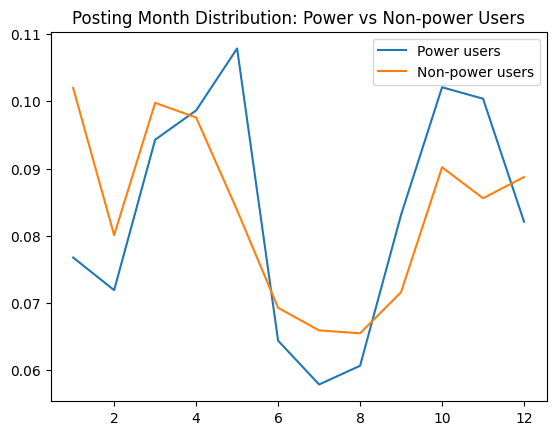

In [178]:
power_month = power_user['post_month'].value_counts(normalize=True).sort_index()
non_power_month = non_power_user['post_month'].value_counts(normalize=True).sort_index()

plt.figure()
plt.plot(power_month.index, power_month.values, label='Power users')
plt.plot(non_power_month.index, non_power_month.values, label='Non-power users')
plt.title('Posting Month Distribution: Power vs Non-power Users')
plt.legend()
plt.show()

This line chart compares the monthly posting distribution between powerful and non-powerful users. Both groups reveal a similar seasonal pattern. Posting activity increases from early months of the year, declines around June to August (mid-year), and rises again after August.
<br>
However, powerful users shows stronger seasonal fluctuations. They demonstrate high peaks around May and October-November, and a sharper decline during the middle of year.
<br>
Overall, although both groups follow similar seasonal trends, power users contribute more strongly to peak months, indicating they strengthen the seasonal posting trends.

### EDA of Is_Public, Is_Friend, and Is_Family columns analysis

The boolen columns related with privacy setting were examined to understand user behaviours.

In [170]:
combined_df_copy01['Is_Public'].value_counts()

,count
Is_Public,
True,69194


In [171]:
combined_df_copy01['Is_Friend'].value_counts()

,count
Is_Friend,
False,69194


In [172]:
combined_df_copy01['Is_Family'].value_counts()

,count
Is_Family,
False,69194


#### Insight 26:

'Is_Public', 'Is_Friend', and 'Is_Family' each contain a single unique value (1, 0, and 0 respectively). Based on both binary encoding and the column naming, these variables are interpreted as boolean indicators.

### EDA of Server and Farm columns analysis

In [173]:
pd.crosstab(combined_df_copy01['Farm'],
            combined_df_copy01['Server'])

Server,0.0,50.0,122.0,783.0,784.0,785.0,786.0,787.0,788.0,789.0,...,7920.0,7921.0,7922.0,7923.0,7924.0,7925.0,7926.0,7927.0,8483.0,65535.0
Farm,,,,,,,,,,,,,,,,,,,,,
0.0,162,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,1,1,17,27,23,21,23,16,18,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,29,26,19,38,23,46,32,26,0,0


### Insight 27:

After do the observation, we found that values from 'Server' column have some pattern that correlated with values from 'Farm' column. For example,

*  Records contain '1.0' in 'Farm' column will have two to three digits (xxx.0) and the first digit is greater than 5 in 'Server' column.
*  Records contain '8.0' in 'Farm' column will have four digits (7xxx.0) where the first digit is 7 and the second digit is greater than 5 in 'Server' column.

